#김동영

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/프로젝트/combined_data (1).csv')

In [ ]:
df['FTHG']

0        2
1        0
2        1
3        0
4        2
        ..
14502    0
14503    3
14504    0
14505    0
14506    0
Name: FTHG, Length: 14507, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## EDA





## Overall

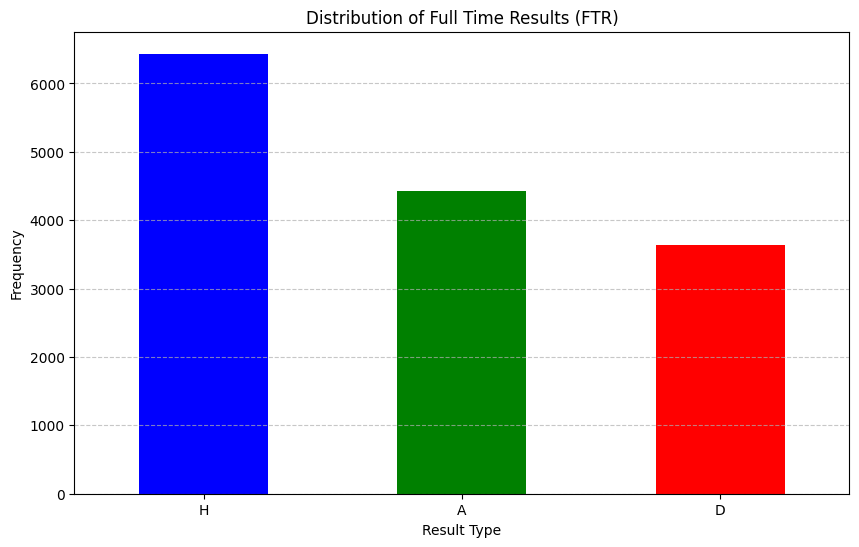

In [ ]:
# Taget = FTR, FTR 개수를 막대그래프로 시각화

# Count the occurrences of each category in 'FTR'
ftr_counts = df['FTR'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR)')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# 경기 결과
df['FTR'].value_counts()

FTR
H    6434
A    4429
D    3644
Name: count, dtype: int64

역시 홈팀이 이기는 경우가 더 많다.

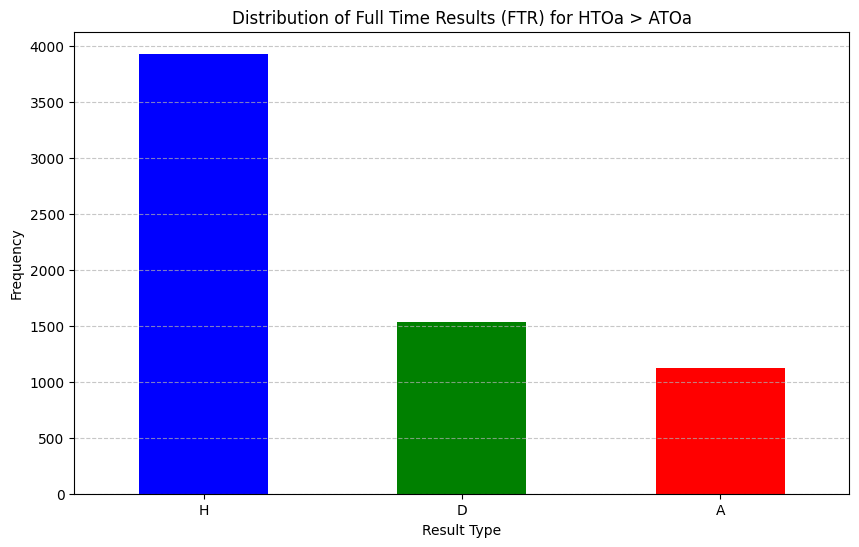

In [ ]:
# 홈팀의 FIFA overall이 원정팀보다 FIFA overall이 높은 경우만 따로 추출
filtered_data = df[df['HTOa'] > df['ATOa']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HTOa > ATOa')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

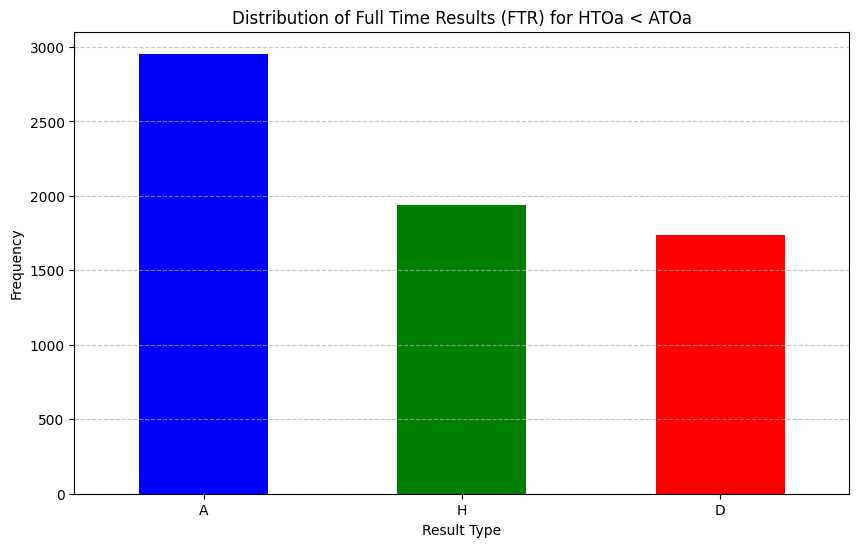

In [ ]:
# 원정팀이 홈팀보다 overall 수치가 더 높은 행들만 추출

filtered_data = df[df['HTOa'] < df['ATOa']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HTOa < ATOa')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

홈팀, 원정팀 할 거 없이 두 팀 중 overall이 더 높은 경우 이길 확률이 더 높다.

다만 원정팀 overall이 더 높은 전제 하에 무승부 경기는 제외하고 원정팀이 이기는 경우 대비 홈팀이 이기는 경우의 확률이 60% 이상이다. 원정팀이 overall이 더 높긴해도 홈팀이 이기는 경우가 생각보다 많이 존재한다.

홈팀의 overall이 높은 경우에는 홈팀이 이기는 경우가 압도적으로 높기 때문에 예측이 수월할 수 있다.

그러나 원정팀의 overall이 더 높은 경우에는 홈팀이 이기는 확률을 적지 않기 때문에 예측하는데 어려움이 있을 수 있다.

이를 고려한다면 원정팀이 홈팀보다 overall이 더 높은 경우는 따로 추출해 모델링을 시도해 볼 수 있을 것 같다.

## Date

In [ ]:
# date 컬럼을 datetime 모듈을 활용해 년,월,일 로 쪼개기

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
# month를 기준으로 groupby하기
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Div         14507 non-null  object        
 1   Date        14507 non-null  datetime64[ns]
 2   HomeTeam    14507 non-null  object        
 3   AwayTeam    14507 non-null  object        
 4   HTOa        14507 non-null  int64         
 5   ATOa        14507 non-null  int64         
 6   HTAt        14507 non-null  int64         
 7   ATAt        14507 non-null  int64         
 8   HTMid       14507 non-null  int64         
 9   ATMid       14507 non-null  int64         
 10  HTDef       14507 non-null  int64         
 11  ATDef       14507 non-null  int64         
 12  HomeSquad   14507 non-null  int64         
 13  AwaySquad   14507 non-null  int64         
 14  HomeAvgAge  14507 non-null  int64         
 15  AwayAvgAge  14507 non-null  int64         
 16  HomeMV      14507 non-

In [ ]:
grouped_data = df.groupby('month')['FTR'].value_counts().unstack(fill_value=0)

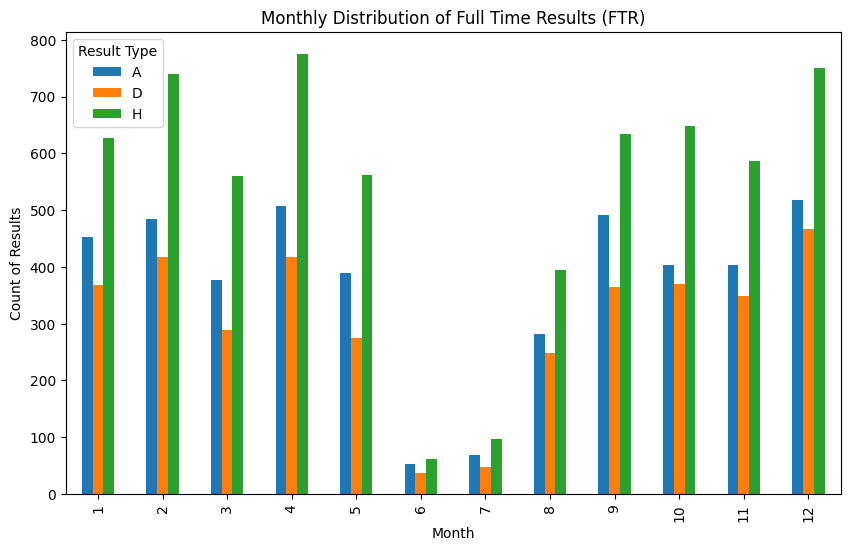

In [ ]:
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Distribution of Full Time Results (FTR)')
plt.xlabel('Month')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

In [ ]:
# 월별 H, A, D 비율

df.groupby('month')['FTR'].value_counts(normalize=True)

month  FTR
1      H      0.433011
       A      0.312845
       D      0.254144
2      H      0.450610
       A      0.295122
       D      0.254268
3      H      0.457143
       A      0.307755
       D      0.235102
4      H      0.455882
       A      0.298824
       D      0.245294
5      H      0.458401
       A      0.317292
       D      0.224307
6      H      0.407895
       A      0.348684
       D      0.243421
7      H      0.454976
       A      0.322275
       D      0.222749
8      H      0.427027
       A      0.304865
       D      0.268108
9      H      0.425789
       A      0.329752
       D      0.244459
10     H      0.456017
       A      0.284307
       D      0.259676
11     H      0.438295
       A      0.301421
       D      0.260284
12     H      0.432776
       A      0.298327
       D      0.268898
Name: proportion, dtype: float64

월별 경기결과를 시각화해본 결과 월마다 홈팀 승, 원정팀 승, 무승부 비율이 크게 다르진 않으나 원정팀의 승리 비율이 30%가 넘지 않는 달이 10, 11, 12, 2월 달이었다.

In [ ]:
df['dayofweek'] = df['Date'].dt.dayofweek #요일 (월 = 0)

In [ ]:
df['dayofweek'].value_counts() # 주중보다는 주말에 경기수가 훨씬 더 많았다.

dayofweek
5    6139
6    5149
2    1059
4     883
0     573
1     467
3     237
Name: count, dtype: int64

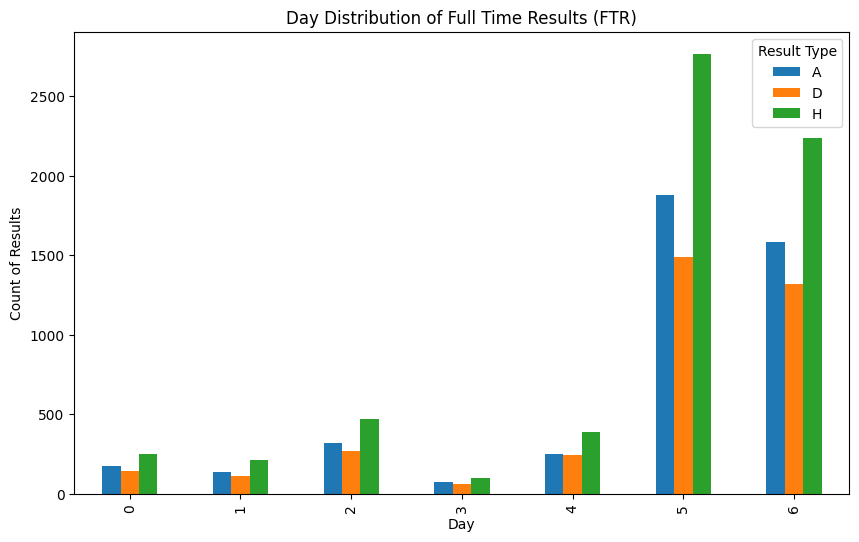

In [ ]:
# 요일별 H, D, A 분포

grouped_data = df.groupby('dayofweek')['FTR'].value_counts().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Day Distribution of Full Time Results (FTR)')
plt.xlabel('Day')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

In [ ]:
df.groupby('dayofweek')['FTR'].value_counts(normalize=True)

dayofweek  FTR
0          H      0.439791
           A      0.305410
           D      0.254799
1          H      0.462527
           A      0.293362
           D      0.244111
2          H      0.441926
           A      0.304060
           D      0.254013
3          H      0.426160
           A      0.320675
           D      0.253165
4          H      0.441676
           A      0.284258
           D      0.274066
5          H      0.450888
           A      0.306402
           D      0.242711
6          H      0.434842
           A      0.308215
           D      0.256943
Name: proportion, dtype: float64

요일별 경기 결과를 확인해봤을 때 기본적으로 홈팀의 경기 승률이 40%가 넘는다.

In [ ]:
# 전반기 후반기로 나누었을 때 경기 결과
df['Period'] = df['Date'].dt.month.apply(lambda x: 'Second Half' if x <= 6 else 'First Half')

In [ ]:
df['Period'].value_counts()

Period
Second Half    7391
First Half     7116
Name: count, dtype: int64

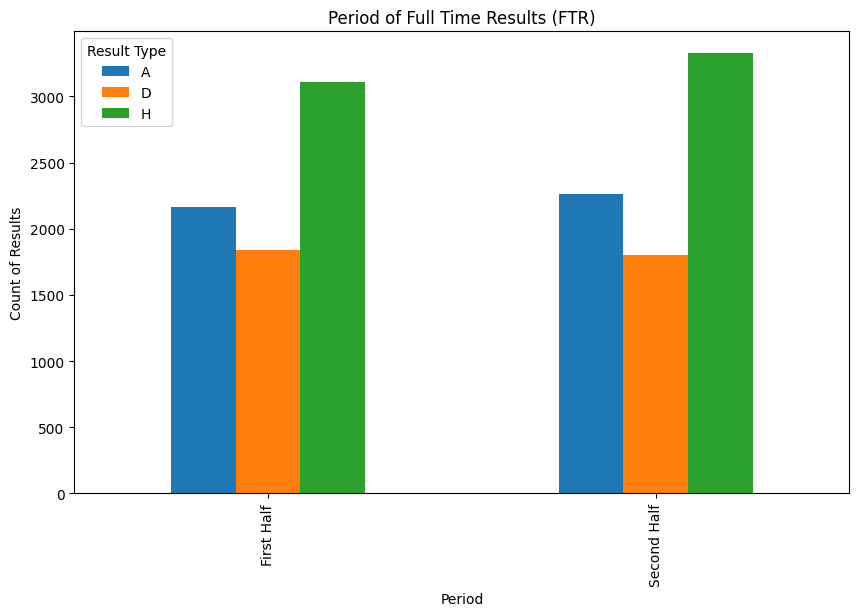

In [ ]:
grouped_data = df.groupby('Period')['FTR'].value_counts().unstack(fill_value=0)

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Period of Full Time Results (FTR)')
plt.xlabel('Period')
plt.ylabel('Count of Results')
plt.legend(title='Result Type')
plt.show()

날짜를 전반기, 후반기를 기준으로 나눴을 때 차이는 거의 없었다.

In [ ]:
# 홈팀 배당률 평균
columns_to_average_h = ['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'PSCH']
df['h_average_odds'] = df[columns_to_average_h].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365H', 'BWH', 'IWH', 'PSH', 'WHH', 'VCH', 'PSCH', 'h_average_odds']].head()

,B365H,BWH,IWH,PSH,WHH,VCH,PSCH,average_odds
0,1.25,1.25,1.30,1.26,1.25,1.25,1.29,1.264286
1,3.20,2.90,2.90,3.14,3.10,3.20,3.11,3.078571
2,1.36,1.40,1.33,1.37,1.36,1.36,1.45,1.375714
3,2.50,2.50,2.30,2.48,2.60,2.55,2.31,2.462857
4,1.95,1.95,2.00,1.95,1.95,1.95,2.01,1.965714


In [ ]:
# 원정팀 배당률 평균
columns_to_average_a = ['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'PSCA']
df['a_average_odds'] = df[columns_to_average_a].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365A', 'BWA', 'IWA', 'PSA', 'WHA', 'VCA', 'PSCA', 'a_average_odds']].head()

,B365A,BWA,IWA,PSA,WHA,VCA,PSCA,a_average_odds
0,15.0,12.00,9.0,14.01,12.0,10.50,12.75,12.180000
1,2.4,2.40,2.3,2.46,2.4,2.40,2.47,2.404286
2,11.0,9.00,8.0,10.60,9.0,10.00,8.25,9.407143
3,3.1,2.85,2.9,3.22,2.9,3.12,3.59,3.097143
4,4.5,3.90,3.6,4.55,4.2,4.75,4.51,4.287143


In [ ]:
# 무승부 배당률 평균
columns_to_average_d = ['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'PSCD']
df['d_average_odds'] = df[columns_to_average_d].mean(axis=1)

# Display the first few rows of the dataframe including the new 'average_odds' column
df[['B365D', 'BWD', 'IWD', 'PSD', 'WHD', 'VCD', 'PSCD', 'd_average_odds']].head()

,B365D,BWD,IWD,PSD,WHD,VCD,PSCD,d_average_odds
0,6.5,5.50,5.0,6.45,5.5,6.25,5.90,5.871429
1,3.4,3.20,3.3,3.38,3.1,3.40,3.40,3.311429
2,5.0,4.75,5.0,5.10,4.5,5.20,4.81,4.908571
3,3.3,3.10,3.3,3.26,3.0,3.20,3.24,3.200000
4,3.5,3.30,3.3,3.47,3.2,3.30,3.34,3.344286


배당률은 경기 내적인 변수가 아니기 때문에 제외한다.

## xG

In [ ]:
# HxG, AxG, HxA, AxA 평균값 구하기

# Columns of interest
columns_to_average = ['HxG', 'AxG', 'HxA', 'AxA']

# Initialize an empty dictionary to store averages
averages = {}

# Loop through each column and calculate the mean
for column in columns_to_average:
    averages[column] = df[column].mean()

# Print the average values
for key, value in averages.items():
    print(f"Average {key}: {value}")

Average HxG: 1.5086916660922312
Average AxG: 1.1901102915833737
Average HxA: 1.0659052675124105
Average AxA: 0.8541485107556536


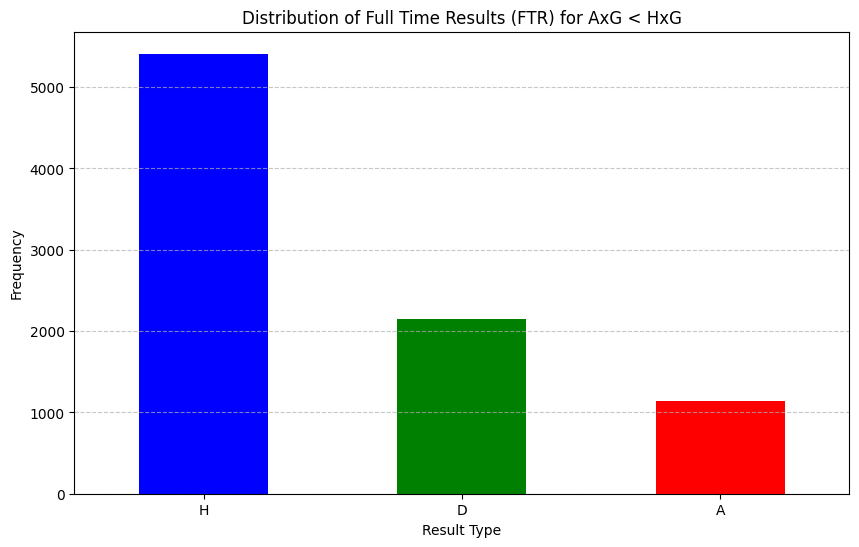

In [ ]:
filtered_data = df[df['AxG'] < df['HxG']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for AxG < HxG')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

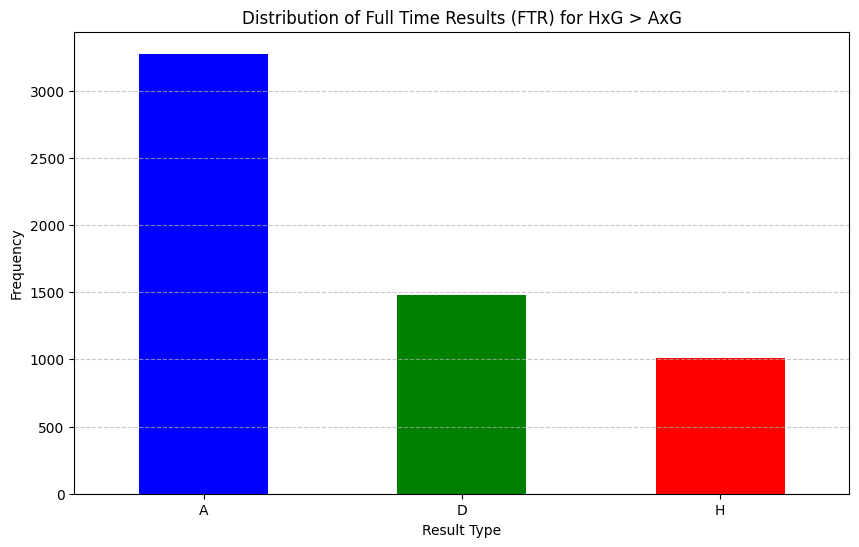

In [ ]:
filtered_data = df[df['HxG'] < df['AxG']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HxG > AxG')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

홈팀, 원정팀 상관없이 xG 값이 높은 팀이 더 높은 확률로 승리한다.

In [ ]:
df.columns



Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt',
       'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad',
       'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS',
       'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'PSCH', 'PSCD', 'PSCA', 'year', 'month', 'day', 'dayofweek',
       'Period'],
      dtype='object')

## AvgAge

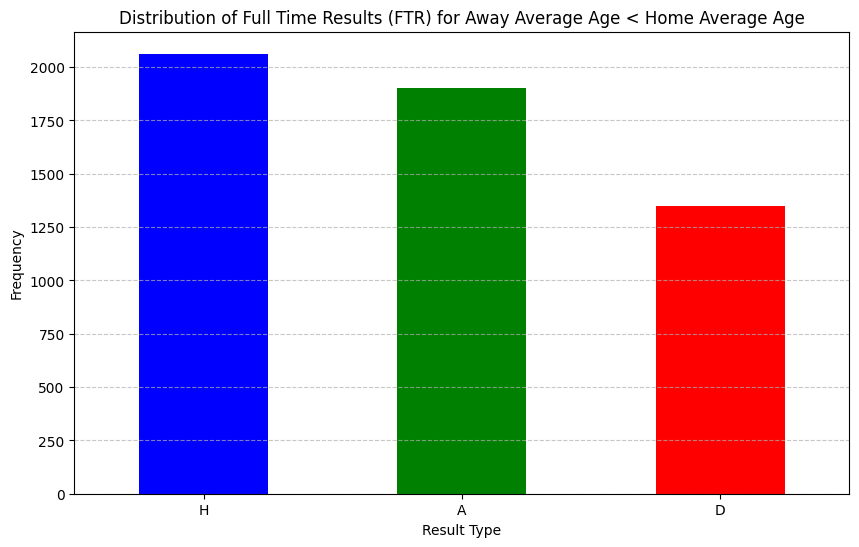

In [ ]:
# 홈팀 평균 나이가 원정팀의 평균 나이보다 많은 경우

filtered_data = df[df['HomeAvgAge'] > df['AwayAvgAge']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Average Age < Home Average Age')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

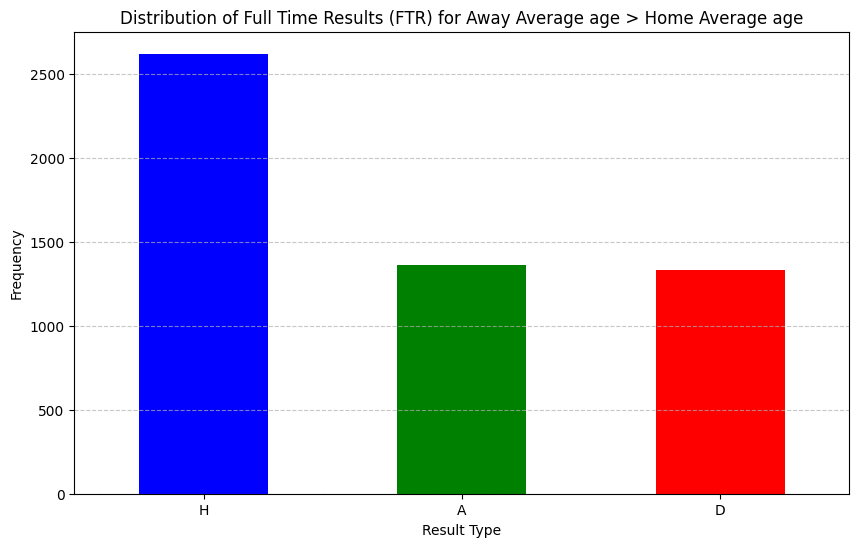

In [ ]:
filtered_data = df[df['HomeAvgAge'] < df['AwayAvgAge']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Average age > Home Average age')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

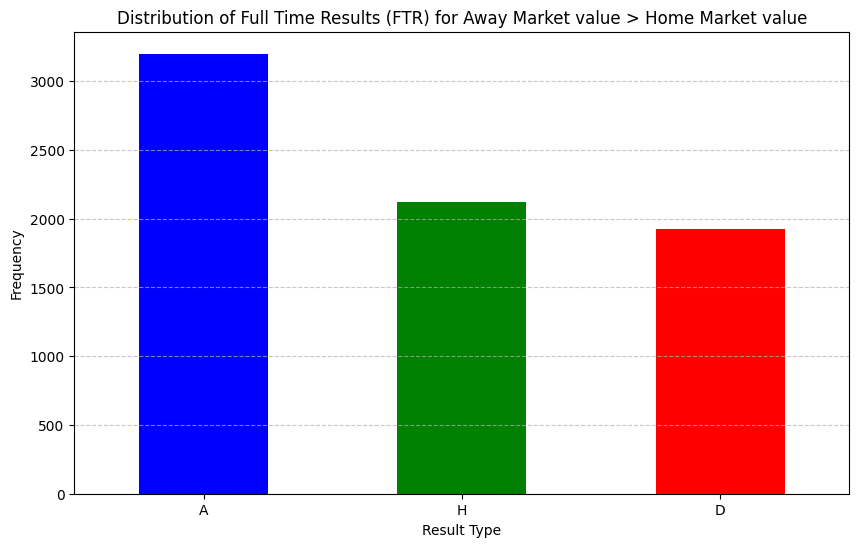

In [ ]:
# Market value

filtered_data = df[df['HomeMV'] < df['AwayMV']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Market value > Home Market value')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

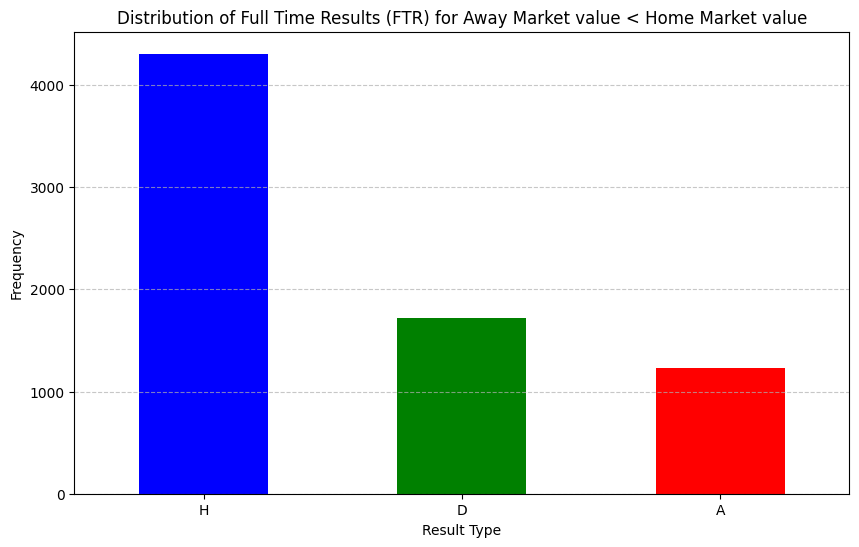

In [ ]:
# Market value

filtered_data = df[df['HomeMV'] > df['AwayMV']]

filtered_ftr_counts = filtered_data['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
filtered_ftr_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for Away Market value < Home Market value')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## heatmap

In [ ]:
mapping = {'H': 0, 'A': 1, 'D': 2}  # 변환을 위한 매핑 딕셔너리
df['FTR'] = df['FTR'].replace(mapping)

In [ ]:
df['FTR'].value_counts()

FTR
0    6434
1    4429
2    3644
Name: count, dtype: int64

KeyboardInterrupt: 

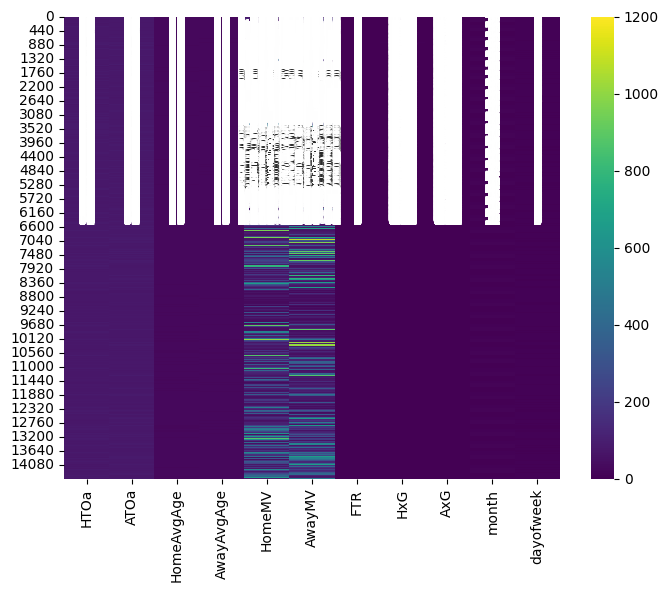

In [ ]:
# heatmap

# 원하는 컬럼 선택
selected_columns = ['HTOa', 'ATOa', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTR', 'HxG', 'AxG', 'month', 'dayofweek']
selected_data = df[selected_columns]

corr_data = selected_data.corr()

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))  # 그림 크기 설정
sns.heatmap(selected_data, annot=True, cmap='viridis')  # 선택한 데이터로 히트맵 생성
plt.show()  # 표시

#박민규

In [ ]:
df.head()

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,12.00,1.20,7.0,12.0,1.29,6.0,12.00,1.29,6.67,10.58
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,5.56,1.62,4.2,5.0,1.65,4.0,6.00,1.75,4.18,4.77
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,3.93,2.10,3.3,3.5,2.05,3.5,4.00,2.01,3.74,3.92
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,3.89,2.05,3.6,3.4,2.05,3.6,3.80,2.06,3.62,3.86
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,2.37,3.20,3.2,2.3,3.20,3.5,2.38,3.10,3.60,2.37


In [ ]:
df.tail()

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
14502,I1,2022-05-22,Spezia,Napoli,71,80,71,82,70,80,...,1.54,6.00,4.33,1.50,6.00,4.40,1.50,4.68,4.16,1.74
14503,I1,2022-05-22,Inter,Sampdoria,82,75,82,77,82,75,...,23.58,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74
14504,I1,2022-05-22,Sassuolo,AC Milan,75,81,77,81,76,80,...,1.46,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43
14505,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,4.79,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07
14506,I1,2022-05-22,Venezia,Cagliari,73,73,73,75,72,72,...,1.70,4.50,4.00,1.70,4.60,3.80,1.73,5.66,4.16,1.63


In [ ]:
df.value_counts('Div')

Div
E0     3040
I1     3040
SP1    3040
F1     2939
D1     2448
Name: count, dtype: int64

In [ ]:
#전체 속성의 리스트
print(df.columns.tolist())


['Div', 'Date', 'HomeTeam', 'AwayTeam', 'HTOa', 'ATOa', 'HTAt', 'ATAt', 'HTMid', 'ATMid', 'HTDef', 'ATDef', 'HomeSquad', 'AwaySquad', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV', 'AwayMV', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA', 'AxA', 'HxPTS', 'AxPTS', 'HPPDA', 'APPDA', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']


In [ ]:
# 칼럼 10개씩 끊어서 describe() 출력
for i in range(0, len(df.columns), 10):
  print(df.iloc[:, i:i+10].describe())


               HTOa          ATOa          HTAt          ATAt         HTMid  \
count  14507.000000  14507.000000  14507.000000  14507.000000  14507.000000   
mean      76.444337     76.445095     77.132419     77.131454     76.189977   
std        3.675912      3.676542      4.481718      4.484761      3.941304   
min       67.000000     67.000000     64.000000     64.000000     63.000000   
25%       74.000000     74.000000     74.000000     74.000000     74.000000   
50%       76.000000     76.000000     77.000000     77.000000     76.000000   
75%       79.000000     79.000000     80.000000     80.000000     79.000000   
max       86.000000     86.000000     92.000000     92.000000     89.000000   

              ATMid  
count  14507.000000  
mean      76.194044  
std        3.947214  
min       63.000000  
25%       74.000000  
50%       76.000000  
75%       79.000000  
max       89.000000  
              HTDef         ATDef     HomeSquad     AwaySquad    HomeAvgAge  \
count  1450

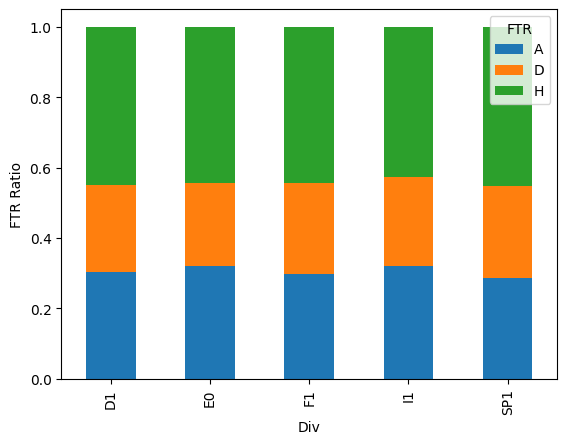

In [ ]:
# prompt: Div별로 FTR 막대그래프 비율그래프 그려줘

import matplotlib.pyplot as plt

# Div별 FTR 비율그래프 그리기
df.groupby('Div')['FTR'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.xlabel('Div')
plt.ylabel('FTR Ratio')
plt.show()


In [ ]:
# prompt: HomeMV-AwayMV 칼럼을 만들어줘

df['HomeMV-AwayMV'] = df['HomeMV'] - df['AwayMV']
df.head()


,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,HomeMV-AwayMV
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,1.20,7.0,12.0,1.29,6.0,12.00,1.29,6.67,10.58,354.08
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,1.62,4.2,5.0,1.65,4.0,6.00,1.75,4.18,4.77,142.15
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,2.10,3.3,3.5,2.05,3.5,4.00,2.01,3.74,3.92,17.50
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,2.05,3.6,3.4,2.05,3.6,3.80,2.06,3.62,3.86,-36.40
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,3.20,3.2,2.3,3.20,3.5,2.38,3.10,3.60,2.37,-135.35


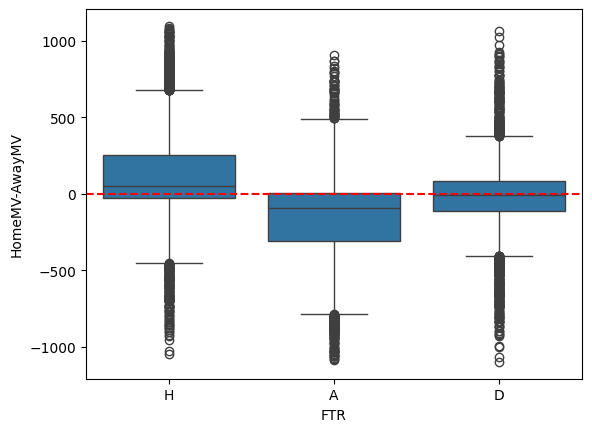

In [ ]:
# prompt: FTR 별로 HomeMV-AwayMV의 박스차트를 그려줘, y축 0에다가 직선을 그어줘

import seaborn as sns

# FTR 별로 HomeMV-AwayMV의 박스차트 그리기
sns.boxplot(x="FTR", y="HomeMV-AwayMV", data=df)

# y축 0에다가 직선을 그어주기
import matplotlib.pyplot as plt
plt.axhline(y=0, color='r', linestyle='--')

# 그래프 출력
plt.show()


In [ ]:
df['HomeAvgAge-AwayAvgAge'] = df['HomeAvgAge'] - df['AwayAvgAge']
df.head()

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,HomeMV-AwayMV,HomeAvgAge-AwayAvgAge
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,7.0,12.0,1.29,6.0,12.00,1.29,6.67,10.58,354.08,-1
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,4.2,5.0,1.65,4.0,6.00,1.75,4.18,4.77,142.15,0
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,3.3,3.5,2.05,3.5,4.00,2.01,3.74,3.92,17.50,0
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,3.6,3.4,2.05,3.6,3.80,2.06,3.62,3.86,-36.40,0
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,3.2,2.3,3.20,3.5,2.38,3.10,3.60,2.37,-135.35,1


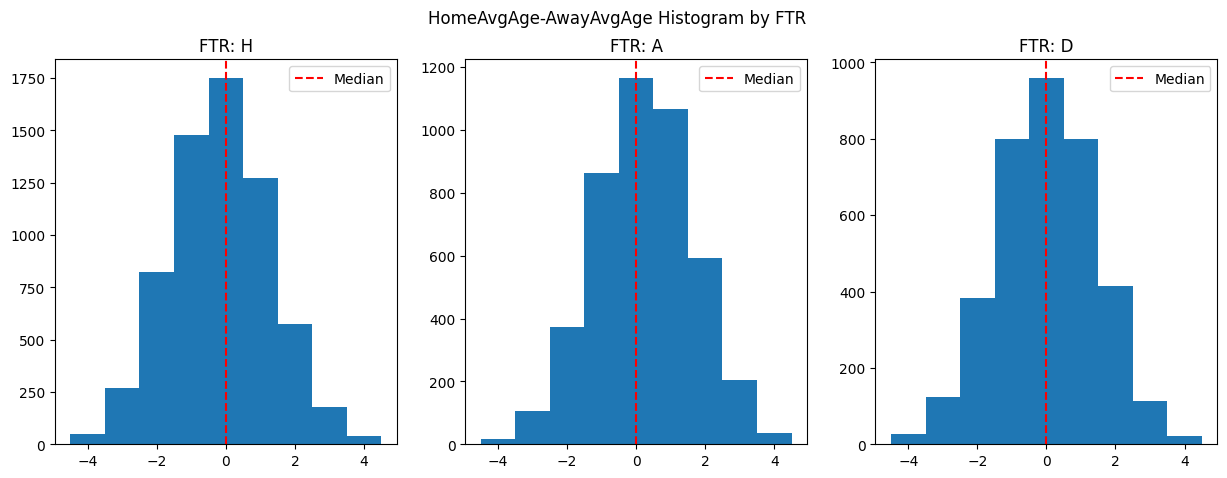

In [ ]:
#승리팀 별 나이차이, 승리팀이 좀 더 어린 경향
import matplotlib.pyplot as plt

# Define custom bin edges
bin_edges = [-4.5,-3.5,-2.5,-1.5,-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Example intervals

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('HomeAvgAge-AwayAvgAge Histogram by FTR')

for i, ftr in enumerate(['H', 'A', 'D']):
    df_ftr = df[df['FTR'] == ftr]
    axes[i].hist(df_ftr['HomeAvgAge-AwayAvgAge'], bins=bin_edges)
    axes[i].set_title(f'FTR: {ftr}')
    axes[i].axvline(df_ftr['HomeAvgAge-AwayAvgAge'].median(), color='r', linestyle='--', label='Median')
    axes[i].legend()

plt.show()

In [ ]:
# prompt: null값 확인, 모두 프린트

null_values = df.isnull().sum()
for column, null_count in null_values.items():
  if null_count > 0:
    print(f"Column '{column}' has {null_count} null values.")
  else:
    print(f"Column '{column}' has no null values.")

Column 'Div' has no null values.
Column 'Date' has no null values.
Column 'HomeTeam' has no null values.
Column 'AwayTeam' has no null values.
Column 'HTOa' has no null values.
Column 'ATOa' has no null values.
Column 'HTAt' has no null values.
Column 'ATAt' has no null values.
Column 'HTMid' has no null values.
Column 'ATMid' has no null values.
Column 'HTDef' has no null values.
Column 'ATDef' has no null values.
Column 'HomeSquad' has no null values.
Column 'AwaySquad' has no null values.
Column 'HomeAvgAge' has no null values.
Column 'AwayAvgAge' has no null values.
Column 'HomeMV' has no null values.
Column 'AwayMV' has no null values.
Column 'FTHG' has no null values.
Column 'FTAG' has no null values.
Column 'FTR' has no null values.
Column 'HTHG' has 2 null values.
Column 'HTAG' has 2 null values.
Column 'HTR' has 2 null values.
Column 'HS' has 1 null values.
Column 'AS' has 1 null values.
Column 'HST' has 1 null values.
Column 'AST' has 1 null values.
Column 'HF' has 1 null val

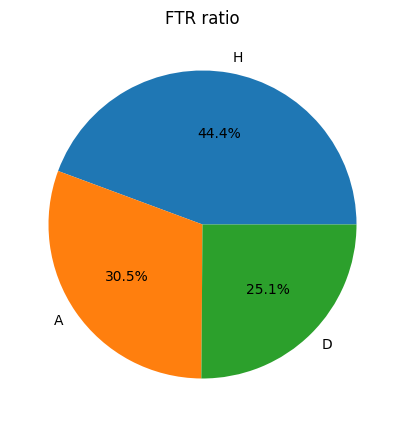

FTR
H    6434
A    4429
D    3644
Name: count, dtype: int64


In [ ]:
# prompt: FTR속성의 각 unique 비중 시각화하기

import matplotlib.pyplot as plt

# FTR 속성의 unique 값 카운트
ftr_counts = df['FTR'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(5, 5))
plt.pie(ftr_counts, labels=ftr_counts.index, autopct="%1.1f%%")
plt.title("FTR ratio")
plt.show()
print(ftr_counts)

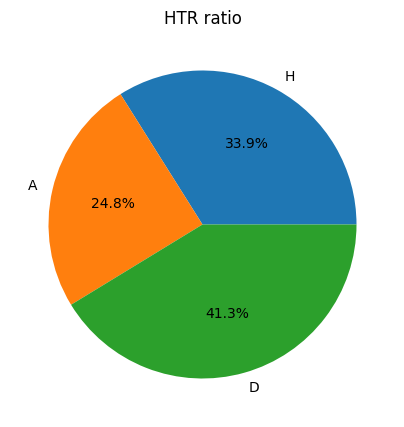

HTR
H    4923
A    3595
D    5987
Name: count, dtype: int64


In [ ]:
# prompt: HTR파이차트를 H,A,D 순서로 만들어줘

# HTR 속성의 unique 값 카운트
htr_counts = df['HTR'].value_counts()

# 순서 변경
htr_counts = htr_counts.reindex(['H', 'A', 'D'])

# 파이 차트 그리기
plt.figure(figsize=(5, 5))
plt.pie(htr_counts, labels=htr_counts.index, autopct="%1.1f%%")
plt.title("HTR ratio")
plt.show()

print(htr_counts)


In [ ]:
# 숫자가 아닌 값 확인
non_numeric_columns = df.select_dtypes(include=["object"]).columns

# 숫자가 아닌 열 이름 출력
print(f"숫자가 아닌 열: {non_numeric_columns}")

숫자가 아닌 열: Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR'], dtype='object')


In [ ]:
# 상관관계 분석
df_non_numeric = df.drop(non_numeric_columns, axis=1)
correlation_matrix = df_non_numeric.corr()

In [ ]:
correlation_matrix

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,HomeMV-AwayMV,HomeAvgAge-AwayAvgAge
HTOa,1.000000,0.125212,0.922364,0.119443,0.957590,0.141751,0.948308,0.123819,0.074026,0.026387,...,0.523645,0.612661,-0.334029,0.508450,0.589278,-0.328148,0.485704,0.600939,0.585613,-0.163689
ATOa,0.125212,1.000000,0.120208,0.922424,0.138438,0.957658,0.126988,0.949456,0.026010,0.073330,...,0.025830,-0.341331,0.596630,0.011721,-0.334973,0.594046,0.012193,-0.343258,-0.585060,0.164978
HTAt,0.922364,0.120208,1.000000,0.113168,0.873164,0.135870,0.855524,0.119044,0.096625,0.046801,...,0.520227,0.592755,-0.312417,0.504884,0.570940,-0.306632,0.487074,0.583092,0.557600,-0.164304
ATAt,0.119443,0.922424,0.113168,1.000000,0.132461,0.873539,0.119937,0.856479,0.048389,0.094214,...,0.040563,-0.319940,0.579126,0.026005,-0.313338,0.577017,0.027001,-0.320501,-0.555896,0.164439
HTMid,0.957590,0.138438,0.873164,0.132461,1.000000,0.161527,0.901130,0.140242,0.056578,0.024289,...,0.509741,0.585847,-0.320835,0.489937,0.562572,-0.314804,0.467558,0.573337,0.553596,-0.155805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSCH,-0.328148,0.594046,-0.306632,0.577017,-0.314804,0.569494,-0.313804,0.562898,0.013457,0.017229,...,0.086484,-0.418803,0.969457,0.084041,-0.399957,1.000000,0.103112,-0.416628,-0.701302,0.187620
PSCD,0.485704,0.012193,0.487074,0.027001,0.467558,0.016886,0.446077,-0.002867,-0.008261,-0.015445,...,0.947544,0.790573,0.093684,0.966704,0.800740,0.103112,1.000000,0.810230,0.361074,-0.099385
PSCA,0.600939,-0.343258,0.583092,-0.320501,0.573337,-0.326953,0.566904,-0.331180,-0.000077,-0.011682,...,0.791778,0.964622,-0.413907,0.806889,0.960459,-0.416628,0.810230,1.000000,0.713257,-0.199824
HomeMV-AwayMV,0.585613,-0.585060,0.557600,-0.555896,0.553596,-0.550912,0.551002,-0.553147,0.053274,-0.053883,...,0.386958,0.728775,-0.706352,0.380269,0.701982,-0.701302,0.361074,0.713257,1.000000,-0.311566


<Axes: >

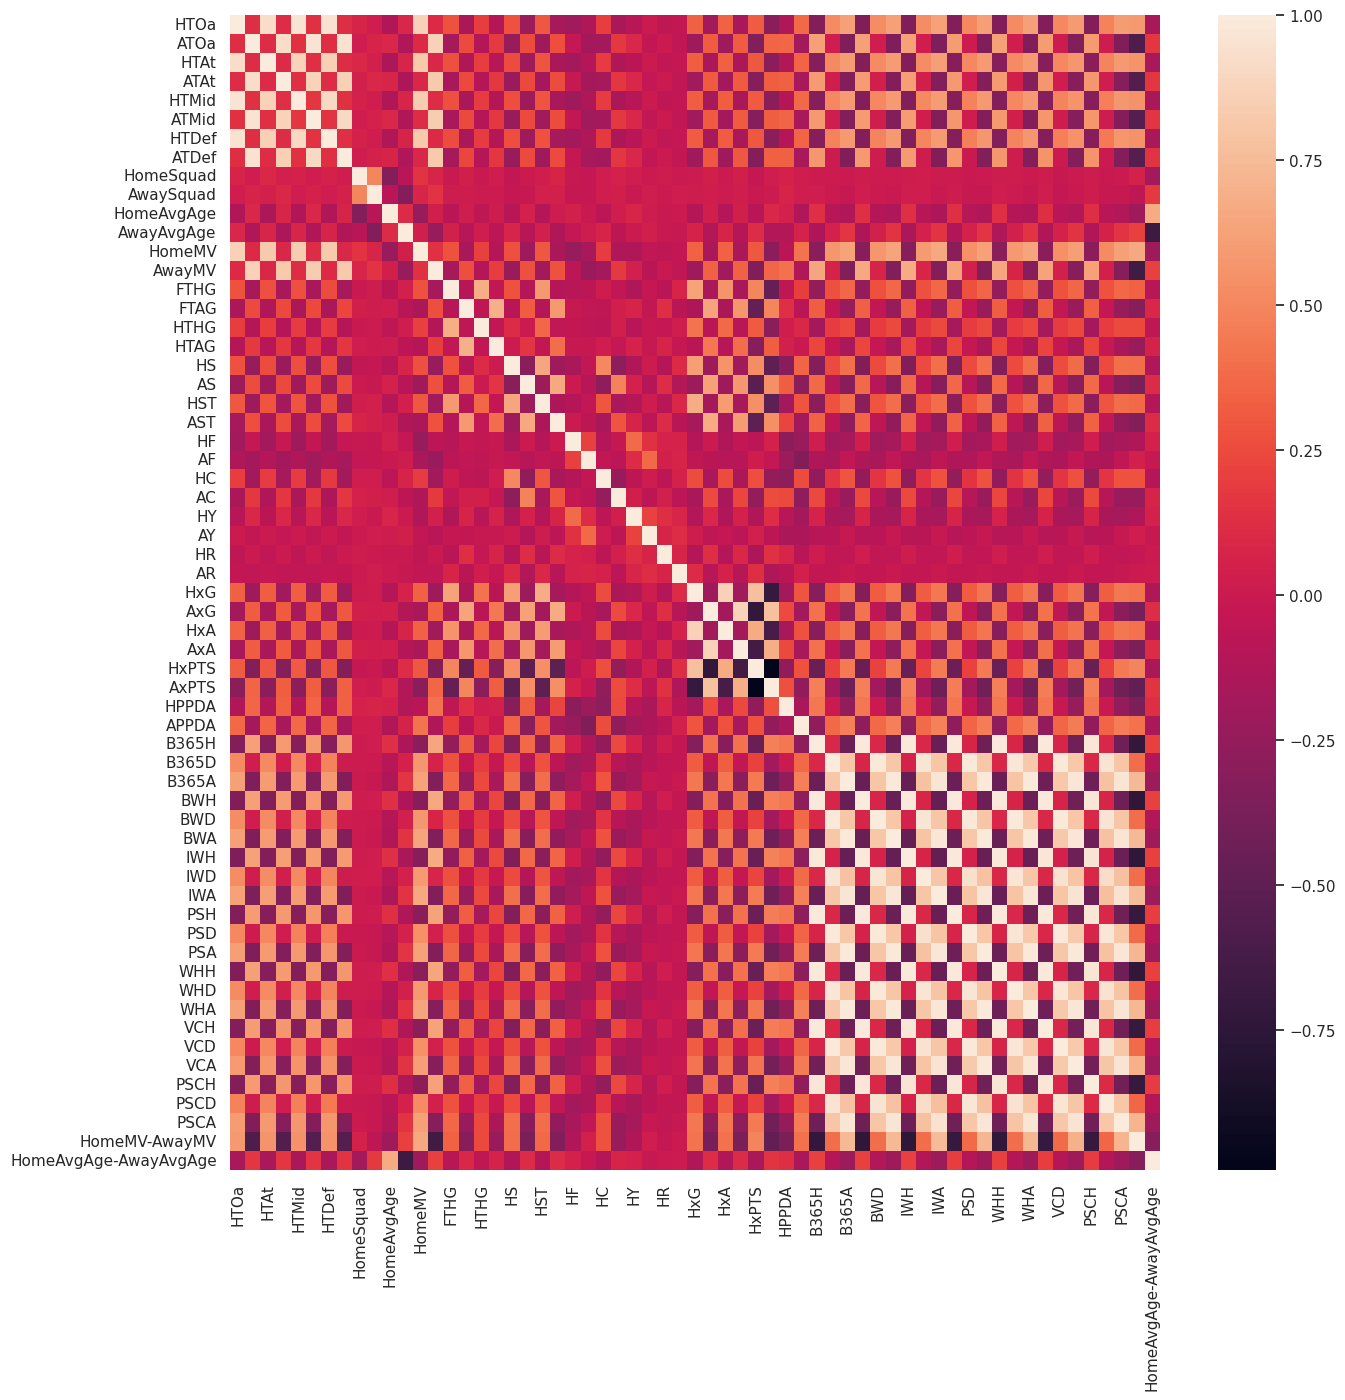

In [ ]:
# prompt: seaborn으로 상관관계 시각화, 크기 더 크게하고 상관계수 없이

import seaborn as sns

# Set the figure size
sns.set(rc={'figure.figsize':(15, 15)})

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False)


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['FTR_label'] = le.fit_transform(df['FTR'])

df['FTR_label']


0        2
1        0
2        2
3        1
4        2
        ..
14502    0
14503    2
14504    0
14505    0
14506    1
Name: FTR_label, Length: 14507, dtype: int64

In [ ]:
# prompt: FTR을 one-hot 인코딩해줘, 불린값말고 0과 1로나오게

import pandas as pd
df = pd.get_dummies(df, columns=['FTR'], dtype=int)
df


,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,VCA,PSCH,PSCD,PSCA,HomeMV-AwayMV,HomeAvgAge-AwayAvgAge,FTR_label,FTR_A,FTR_D,FTR_H
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,12.00,1.29,6.67,10.58,354.08,-1,2,0,0,1
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,6.00,1.75,4.18,4.77,142.15,0,0,1,0,0
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,4.00,2.01,3.74,3.92,17.50,0,2,0,0,1
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,3.80,2.06,3.62,3.86,-36.40,0,1,0,1,0
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,2.38,3.10,3.60,2.37,-135.35,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,I1,2022-05-22,Spezia,Napoli,71,80,71,82,70,80,...,1.50,4.68,4.16,1.74,-398.73,-2,0,1,0,0
14503,I1,2022-05-22,Inter,Sampdoria,82,75,82,77,82,75,...,26.00,1.13,10.24,24.74,430.00,1,2,0,0,1
14504,I1,2022-05-22,Sassuolo,AC Milan,75,81,77,81,76,80,...,1.40,7.62,5.12,1.43,-295.95,0,0,1,0,0
14505,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,4.80,1.89,4.01,4.07,-71.74,0,0,1,0,0


#김선화

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         14507 non-null  object 
 1   Date        14507 non-null  object 
 2   HomeTeam    14507 non-null  object 
 3   AwayTeam    14507 non-null  object 
 4   HTOa        14507 non-null  int64  
 5   ATOa        14507 non-null  int64  
 6   HTAt        14507 non-null  int64  
 7   ATAt        14507 non-null  int64  
 8   HTMid       14507 non-null  int64  
 9   ATMid       14507 non-null  int64  
 10  HTDef       14507 non-null  int64  
 11  ATDef       14507 non-null  int64  
 12  HomeSquad   14507 non-null  int64  
 13  AwaySquad   14507 non-null  int64  
 14  HomeAvgAge  14507 non-null  int64  
 15  AwayAvgAge  14507 non-null  int64  
 16  HomeMV      14507 non-null  float64
 17  AwayMV      14507 non-null  float64
 18  FTHG        14507 non-null  int64  
 19  FTAG        14507 non-nul

In [ ]:
data.describe()

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
count,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,14507.000000,...,14485.000000,14500.000000,14500.000000,14500.000000,14502.000000,14502.000000,14502.000000,14505.000000,14505.000000,14505.000000
mean,76.444337,76.445095,77.132419,77.131454,76.189977,76.194044,75.635073,75.636451,37.538499,37.538223,...,4.915274,2.812852,3.920908,4.676281,2.866397,4.103015,4.897394,2.939099,4.227670,4.995999
std,3.675912,3.676542,4.481718,4.484761,3.941304,3.947214,3.724651,3.722379,6.434566,6.434589,...,4.502234,2.071483,1.258532,4.247873,2.247525,1.514149,4.806441,2.332450,1.684775,4.732794
min,67.000000,67.000000,64.000000,64.000000,63.000000,63.000000,64.000000,64.000000,25.000000,25.000000,...,1.090000,1.020000,1.200000,1.080000,1.030000,2.200000,1.070000,1.040000,2.300000,1.080000
25%,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,73.000000,73.000000,33.000000,33.000000,...,2.440000,1.700000,3.200000,2.400000,1.700000,3.300000,2.400000,1.700000,3.370000,2.430000
50%,76.000000,76.000000,77.000000,77.000000,76.000000,76.000000,75.000000,75.000000,37.000000,37.000000,...,3.510000,2.250000,3.500000,3.300000,2.200000,3.600000,3.400000,2.260000,3.660000,3.540000
75%,79.000000,79.000000,80.000000,80.000000,79.000000,79.000000,78.000000,78.000000,41.000000,41.000000,...,5.450000,3.000000,4.000000,5.000000,3.100000,4.200000,5.250000,3.180000,4.370000,5.550000
max,86.000000,86.000000,92.000000,92.000000,89.000000,89.000000,87.000000,87.000000,88.000000,88.000000,...,48.750000,26.000000,19.000000,51.000000,36.000000,26.000000,67.000000,37.630000,26.600000,52.770000


In [ ]:
data = data.replace({'FTR' : 'H'}, 0)
data = data.replace({'FTR' : 'A'}, 1)
data = data.replace({'FTR' : 'D'}, 2)

In [ ]:
data = data.replace({'HTR' : 'H'}, 0)
data = data.replace({'HTR' : 'A'}, 1)
data = data.replace({'HTR' : 'D'}, 2)

In [ ]:
data = data.fillna(0) # 값 없는걸 0으로 대체

In [ ]:
data['HTHG'].unique()

array([1., 0., 2., 3., 4., 5., 6.])

In [ ]:
# data = data.drop(['Div','Date'], axis=1)
# data

In [ ]:
data

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,12.00,1.20,7.00,12.00,1.29,6.00,12.00,1.29,6.67,10.58
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,5.56,1.62,4.20,5.00,1.65,4.00,6.00,1.75,4.18,4.77
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,3.93,2.10,3.30,3.50,2.05,3.50,4.00,2.01,3.74,3.92
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,3.89,2.05,3.60,3.40,2.05,3.60,3.80,2.06,3.62,3.86
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,2.37,3.20,3.20,2.30,3.20,3.50,2.38,3.10,3.60,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,I1,2022-05-22,Spezia,Napoli,71,80,71,82,70,80,...,1.54,6.00,4.33,1.50,6.00,4.40,1.50,4.68,4.16,1.74
14503,I1,2022-05-22,Inter,Sampdoria,82,75,82,77,82,75,...,23.58,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74
14504,I1,2022-05-22,Sassuolo,AC Milan,75,81,77,81,76,80,...,1.46,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43
14505,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,4.79,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07


In [ ]:
data.corr(method='pearson')

/var/folders/zz/f_yhbfns1c74jbf2npw1lrxm0000gn/T/ipykernel_3205/2721894934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
HTOa,1.000000,0.125212,0.922364,0.119443,0.957590,0.141751,0.948308,0.123819,0.074026,0.026387,...,0.607932,-0.339162,0.522464,0.612381,-0.333675,0.508216,0.589280,-0.328217,0.485066,0.600636
ATOa,0.125212,1.000000,0.120208,0.922424,0.138438,0.957658,0.126988,0.949456,0.026010,0.073330,...,-0.347593,0.611797,0.026123,-0.341067,0.596596,0.012072,-0.334752,0.593959,0.012182,-0.343223
HTAt,0.922364,0.120208,1.000000,0.113168,0.873164,0.135870,0.855524,0.119044,0.096625,0.046801,...,0.587714,-0.318370,0.519063,0.592492,-0.312156,0.504455,0.570865,-0.306716,0.486512,0.582860
ATAt,0.119443,0.922424,0.113168,1.000000,0.132461,0.873539,0.119937,0.856479,0.048389,0.094214,...,-0.326487,0.593164,0.040698,-0.319722,0.579104,0.026372,-0.313104,0.576954,0.027037,-0.320442
HTMid,0.957590,0.138438,0.873164,0.132461,1.000000,0.161527,0.901130,0.140242,0.056578,0.024289,...,0.580471,-0.325214,0.508692,0.585650,-0.320492,0.489741,0.562593,-0.314882,0.466939,0.573052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCD,0.508216,0.012072,0.504455,0.026372,0.489741,0.016591,0.469624,-0.002059,-0.018026,-0.024871,...,0.789060,0.074699,0.967715,0.818542,0.087639,1.000000,0.827713,0.082596,0.957709,0.800120
VCA,0.589280,-0.334752,0.570865,-0.313104,0.562593,-0.319371,0.553402,-0.324524,0.003628,-0.010013,...,0.956493,-0.415938,0.800961,0.974922,-0.401426,0.827713,1.000000,-0.399446,0.796749,0.956819
PSCH,-0.328217,0.593959,-0.306716,0.576954,-0.314882,0.569403,-0.313879,0.562836,0.013591,0.017349,...,-0.420747,0.967912,0.085273,-0.417630,0.969155,0.082596,-0.399446,1.000000,0.103492,-0.416367
PSCD,0.485066,0.012182,0.486512,0.027037,0.466939,0.016852,0.445425,-0.002853,-0.007986,-0.015193,...,0.764186,0.082000,0.938110,0.784852,0.093729,0.957709,0.796749,0.103492,1.000000,0.810182


/var/folders/zz/f_yhbfns1c74jbf2npw1lrxm0000gn/T/ipykernel_3205/1888981138.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
/var/folders/zz/f_yhbfns1c74jbf2npw1lrxm0000gn/T/ipykernel_3205/1888981138.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


           HTOa      ATOa      HTAt      ATAt     HTMid     ATMid     HTDef  \
HTOa   1.000000  0.125212  0.922364  0.119443  0.957590  0.141751  0.948308   
ATOa   0.125212  1.000000  0.120208  0.922424  0.138438  0.957658  0.126988   
HTAt   0.922364  0.120208  1.000000  0.113168  0.873164  0.135870  0.855524   
ATAt   0.119443  0.922424  0.113168  1.000000  0.132461  0.873539  0.119937   
HTMid  0.957590  0.138438  0.873164  0.132461  1.000000  0.161527  0.901130   
...         ...       ...       ...       ...       ...       ...       ...   
VCD    0.508216  0.012072  0.504455  0.026372  0.489741  0.016591  0.469624   
VCA    0.589280 -0.334752  0.570865 -0.313104  0.562593 -0.319371  0.553402   
PSCH  -0.328217  0.593959 -0.306716  0.576954 -0.314882  0.569403 -0.313879   
PSCD   0.485066  0.012182  0.486512  0.027037  0.466939  0.016852  0.445425   
PSCA   0.600636 -0.343223  0.582860 -0.320442  0.573052 -0.326930  0.566582   

          ATDef  HomeSquad  AwaySquad  ...       PS

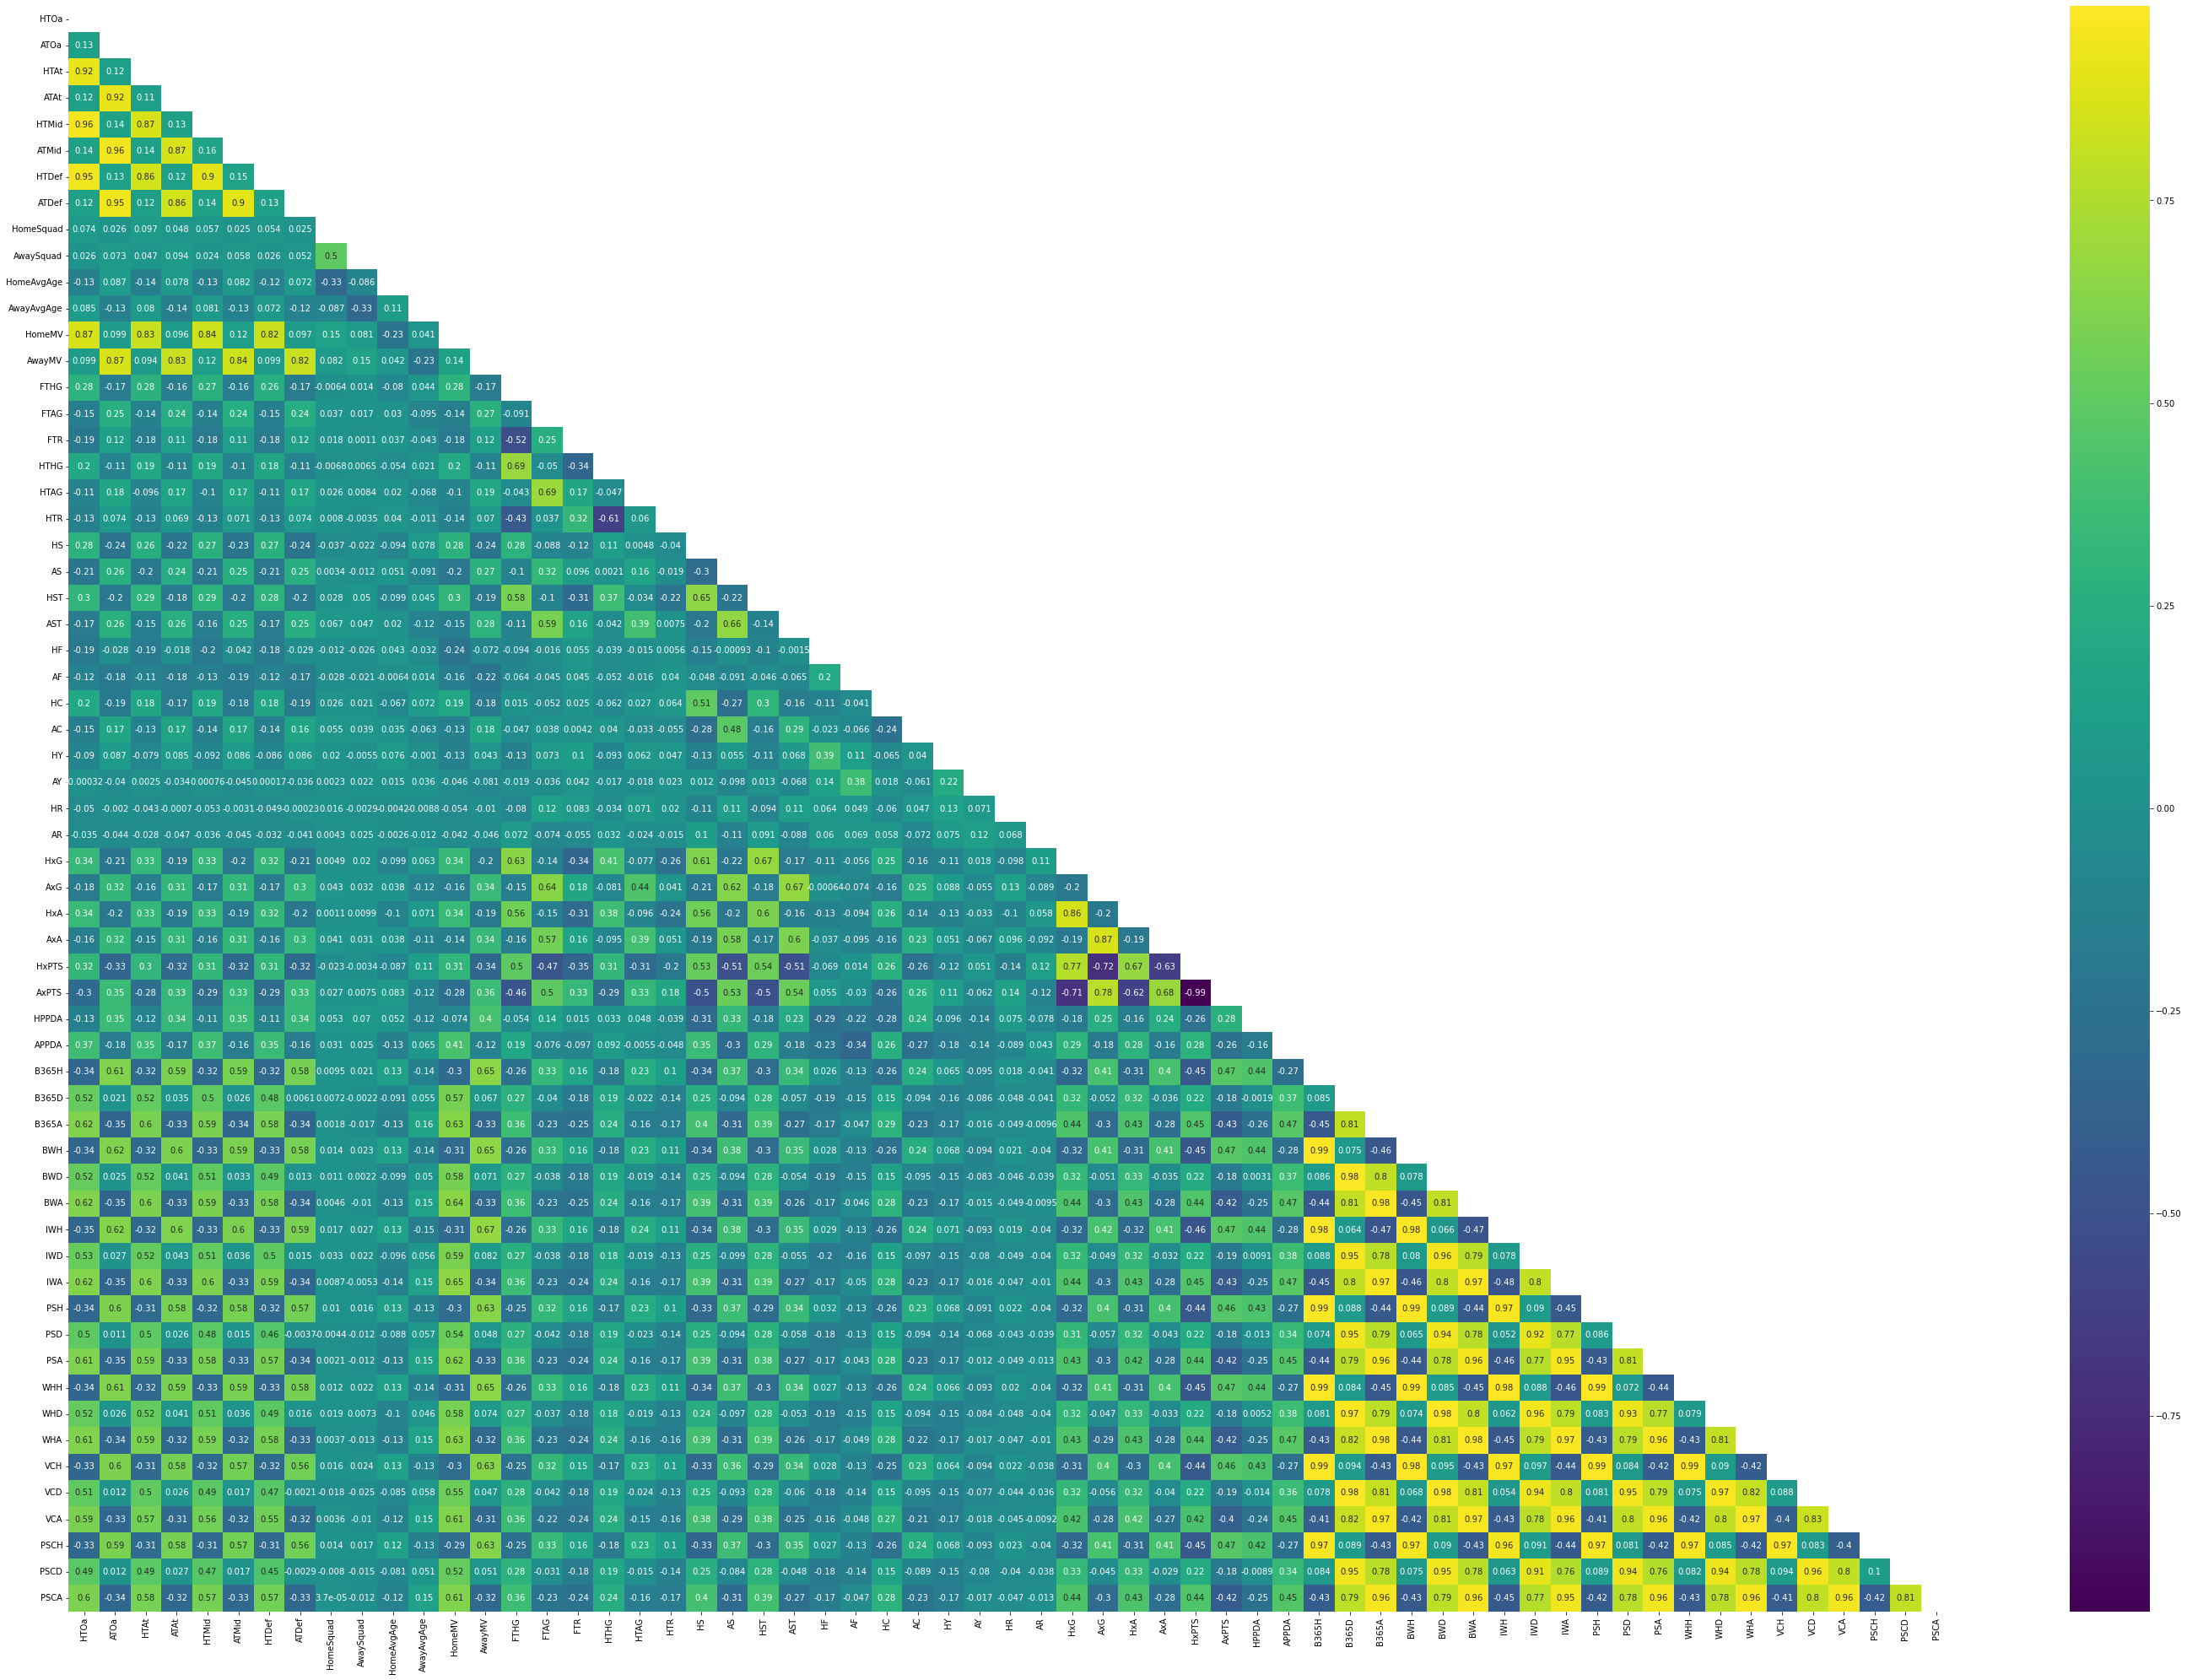

In [ ]:
import seaborn as sns

corr = data.corr()
print(corr)

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(50, 35))
sns.heatmap(corr, annot = True, cmap='viridis', mask=mask)
plt.show()

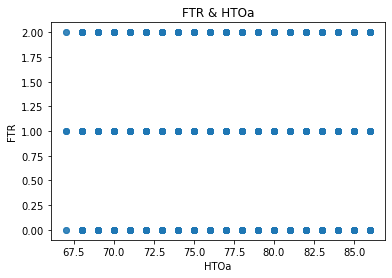

In [ ]:
X = data.HTOa.values
Y = data.FTR.values

plt.scatter(X, Y, alpha=0.5)
plt.title('FTR & HTOa')
plt.xlabel('HTOa')
plt.ylabel('FTR')
plt.show()

In [ ]:
np.cov(X, Y)[0, 1] # 공분산 : 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값이 하강하면 음수

-0.5613745461133253

In [ ]:
np.corrcoef(X,Y)[0, 1] # 상관계수 : 0에 가까울수록 선형 관계 전혀 없다

-0.18830197904298082

In [ ]:
import scipy.stats as stats
stats.pearsonr(X,Y)

# p-value : 상관계수 값 자체가 유의미한가 / 0에 가까운 값이 나오면 귀무가설 기각

PearsonRResult(statistic=-0.18830197904298096, pvalue=6.85158330109886e-116)

In [ ]:
data = data.drop(['Div','Date', 'HomeTeam', 'AwayTeam'], axis=1)
data

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,85,77,87,77,86,78,82,77,33,30,...,12.00,1.20,7.00,12.00,1.29,6.00,12.00,1.29,6.67,10.58
1,81,77,79,79,80,77,82,76,37,26,...,5.56,1.62,4.20,5.00,1.65,4.00,6.00,1.75,4.18,4.77
2,74,72,75,71,74,73,74,71,30,30,...,3.93,2.10,3.30,3.50,2.05,3.50,4.00,2.01,3.74,3.92
3,72,76,74,76,71,76,71,74,27,38,...,3.89,2.05,3.60,3.40,2.05,3.60,3.80,2.06,3.62,3.86
4,74,78,74,84,74,77,72,77,35,36,...,2.37,3.20,3.20,2.30,3.20,3.50,2.38,3.10,3.60,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,71,80,71,82,70,80,71,77,34,37,...,1.54,6.00,4.33,1.50,6.00,4.40,1.50,4.68,4.16,1.74
14503,82,75,82,77,82,75,83,73,36,46,...,23.58,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74
14504,75,81,77,81,76,80,71,80,43,37,...,1.46,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43
14505,71,74,71,75,71,73,68,74,51,44,...,4.79,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07


In [ ]:
for item in data.keys() :
    print(item)
    X = data[item].values
    print('Covariance: {:.2f}'.format(np.cov(X, Y)[0,1]))
    print('Correlation: {:.2f}'.format(stats.pearsonr(X,Y)[0]))
    print('P-value: {:.4f}'.format(stats.pearsonr(X, Y)[1]))
    print('\n')

HTOa
Covariance: -0.56
Correlation: -0.19
P-value: 0.0000


ATOa
Covariance: 0.35
Correlation: 0.12
P-value: 0.0000


HTAt
Covariance: -0.65
Correlation: -0.18
P-value: 0.0000


ATAt
Covariance: 0.41
Correlation: 0.11
P-value: 0.0000


HTMid
Covariance: -0.58
Correlation: -0.18
P-value: 0.0000


ATMid
Covariance: 0.36
Correlation: 0.11
P-value: 0.0000


HTDef
Covariance: -0.53
Correlation: -0.18
P-value: 0.0000


ATDef
Covariance: 0.35
Correlation: 0.12
P-value: 0.0000


HomeSquad
Covariance: 0.09
Correlation: 0.02
P-value: 0.0324


AwaySquad
Covariance: 0.01
Correlation: 0.00
P-value: 0.8904


HomeAvgAge
Covariance: 0.03
Correlation: 0.04
P-value: 0.0000


AwayAvgAge
Covariance: -0.04
Correlation: -0.04
P-value: 0.0000


HomeMV
Covariance: -34.26
Correlation: -0.18
P-value: 0.0000


AwayMV
Covariance: 21.81
Correlation: 0.12
P-value: 0.0000


FTHG
Covariance: -0.55
Correlation: -0.52
P-value: 0.0000


FTAG
Covariance: 0.24
Correlation: 0.25
P-value: 0.0000


FTR
Covariance: 0.66
Corre

In [ ]:
len(data.loc[data['HST'] > data['AST']])

7722

In [ ]:
# plt.rcParams['figure.figsize'] = (20, 10)
# plt.rcParams['axes.grid'] = True

# def bar_chart(feature):
#     global data
#     home = data[data['FTR']==0][feature].value_counts()
#     away = data[data['FTR']==1][feature].value_counts()
#     draw = data[data['FTR']==2][feature].value_counts()
#     data = pd.DataFrame([home, away, draw])
#     data.index = ['home', 'away', 'draw']
#     data.plot(kind='bar', stacked=True)

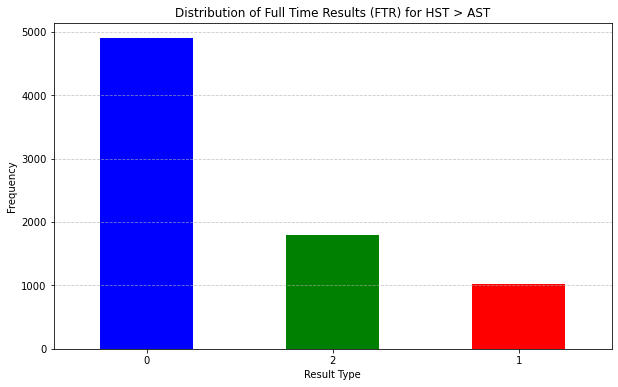

In [ ]:
# 홈팀의 유효슈팅(HSY)이 원정팀보다 높은 경우만 따로 추출
HST_high = data[data['HST'] > data['AST']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HST > AST')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

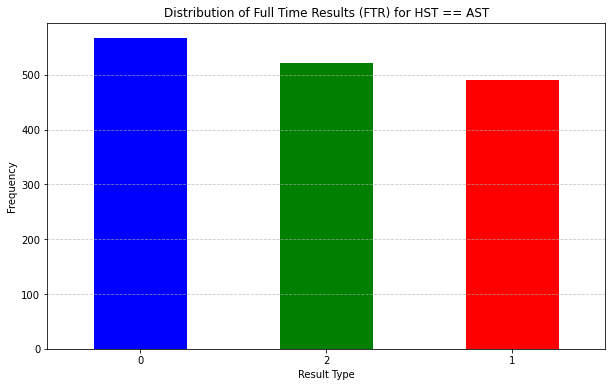

In [ ]:

HST_high = data[data['HST'] == data['AST']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HST == AST')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

유효슈팅의 개수가 같은 경우 홈팀이 좀 더 이길 확률이 높음

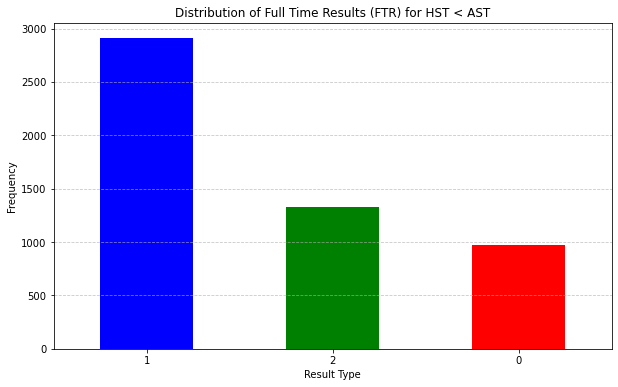

In [ ]:

HST_high = data[data['HST'] < data['AST']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HST < AST')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

유효 슈팅의 개수가 많은 팀이 이길 확률이 높고,
같은 경우 홈팀이 이길 확률이 좀 더 높다.

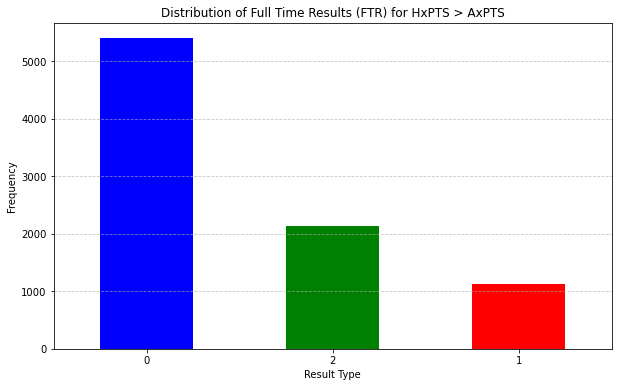

In [ ]:
# 홈팀의 팀 기대포인트(HxPTS)가 원정팀보다 높은 경우만 따로 추출
HST_high = data[data['HxPTS'] > data['AxPTS']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HxPTS > AxPTS')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

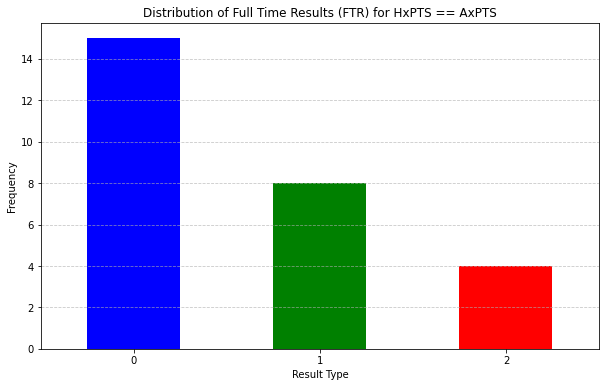

In [ ]:
# 홈팀의 팀 기대포인트(HxPTS)가 원정팀과 같은 경우
HST_high = data[data['HxPTS'] == data['AxPTS']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HxPTS == AxPTS')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

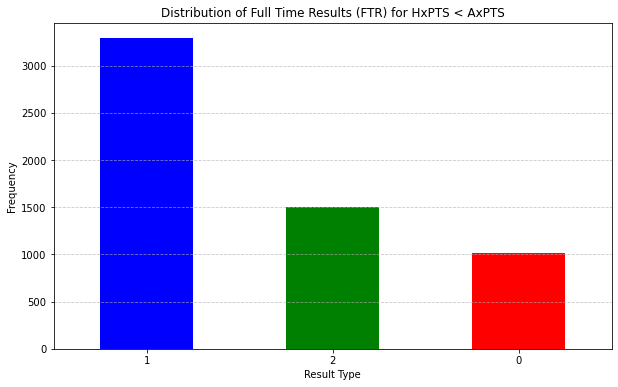

In [ ]:
# 홈팀의 팀 기대포인트(HxPTS)가 원정팀보다 높은 경우만 따로 추출
HST_high = data[data['HxPTS'] < data['AxPTS']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HxPTS < AxPTS')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

기대 포인트가 높은 팀이 이길 확률이 높다.

기대 포인트가 같은 경우는 홈팀이 이길 확률이 높다

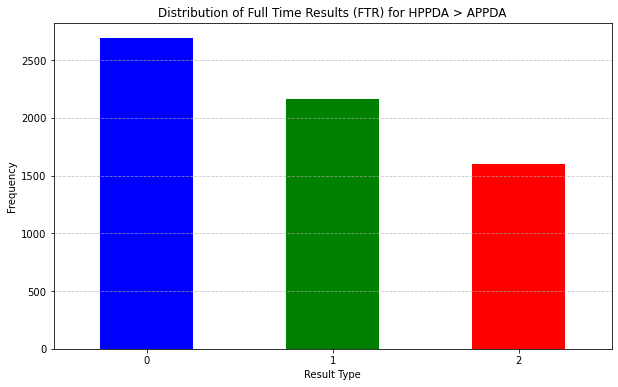

In [ ]:
# 홈팀의 HPPDA가 원정팀보다 높은 경우만 따로 추출
HST_high = data[data['HPPDA'] > data['APPDA']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HPPDA > APPDA')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

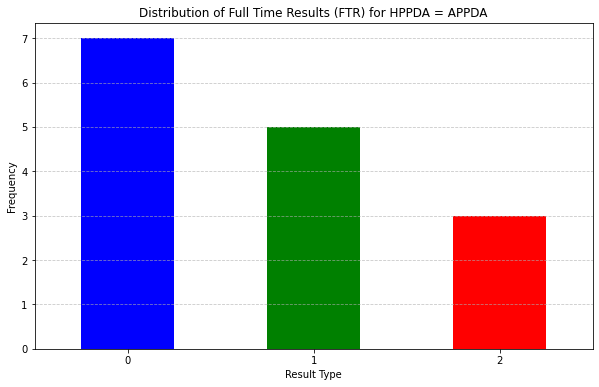

In [ ]:
# 홈팀의 HPPDA가 원정팀과 같은 경우만 따로 추출
HST_high = data[data['HPPDA'] == data['APPDA']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HPPDA = APPDA')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

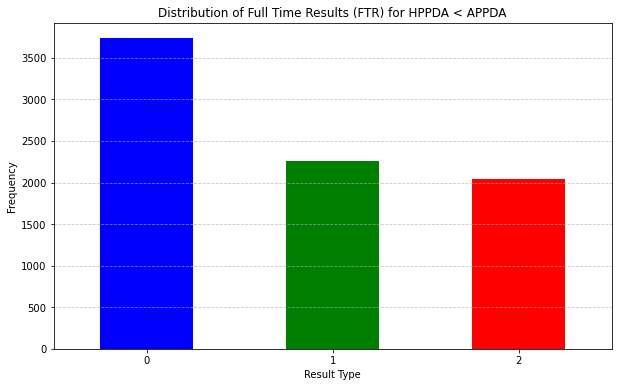

In [ ]:
# 홈팀의 HPPDA가 원정팀과 같은 경우만 따로 추출
HST_high = data[data['HPPDA'] < data['APPDA']]

HST_high_counts = HST_high['FTR'].value_counts()

# 추출한 데이터 FTR 시각화
plt.figure(figsize=(10, 6))
HST_high_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Full Time Results (FTR) for HPPDA < APPDA')
plt.xlabel('Result Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotating the labels to be horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

상대 진영에서 수비 행동당 팀 패스 허용은 모든 결과 홈팀이 높음
또한, 어웨이 팀이 높은 경우 어웨이 팀이 이길 확률이 홈팀이 높은 경우보다 적음

#이지원

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14507 entries, 0 to 14506
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Div         14507 non-null  object 
 1   Date        14507 non-null  object 
 2   HomeTeam    14507 non-null  object 
 3   AwayTeam    14507 non-null  object 
 4   HTOa        14507 non-null  int64  
 5   ATOa        14507 non-null  int64  
 6   HTAt        14507 non-null  int64  
 7   ATAt        14507 non-null  int64  
 8   HTMid       14507 non-null  int64  
 9   ATMid       14507 non-null  int64  
 10  HTDef       14507 non-null  int64  
 11  ATDef       14507 non-null  int64  
 12  HomeSquad   14507 non-null  int64  
 13  AwaySquad   14507 non-null  int64  
 14  HomeAvgAge  14507 non-null  int64  
 15  AwayAvgAge  14507 non-null  int64  
 16  HomeMV      14507 non-null  float64
 17  AwayMV      14507 non-null  float64
 18  FTHG        14507 non-null  int64  
 19  FTAG        14507 non-nul

In [ ]:
# 결측치 제거(53개 행 제거)

df = df.dropna(axis=0, how='any')
#df.reset_index(inplace = True)
df = df.drop(['level_0'], axis=1)
df

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,D1,2014-08-22,Bayern Munich,Wolfsburg,85,77,87,77,86,78,...,12.00,1.20,7.00,12.00,1.29,6.00,12.00,1.29,6.67,10.58
1,D1,2014-08-23,Borussia Dortmund,Bayer Leverkusen,81,77,79,79,80,77,...,5.56,1.62,4.20,5.00,1.65,4.00,6.00,1.75,4.18,4.77
2,D1,2014-08-23,Eintracht Frankfurt,Freiburg,74,72,75,71,74,73,...,3.93,2.10,3.30,3.50,2.05,3.50,4.00,2.01,3.74,3.92
3,D1,2014-08-23,FC Cologne,Hamburger SV,72,76,74,76,71,76,...,3.89,2.05,3.60,3.40,2.05,3.60,3.80,2.06,3.62,3.86
4,D1,2014-08-23,Hannover 96,Schalke 04,74,78,74,84,74,77,...,2.37,3.20,3.20,2.30,3.20,3.50,2.38,3.10,3.60,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,I1,2022-05-22,Spezia,Napoli,71,80,71,82,70,80,...,1.54,6.00,4.33,1.50,6.00,4.40,1.50,4.68,4.16,1.74
14450,I1,2022-05-22,Inter,Sampdoria,82,75,82,77,82,75,...,23.58,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74
14451,I1,2022-05-22,Sassuolo,AC Milan,75,81,77,81,76,80,...,1.46,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43
14452,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,4.79,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07


In [ ]:
# target 변수 값 변경해주기
# H -> 0, D -> 1, A -> 2

boolean1 = df['FTR'] == 'H'
boolean2 = df['FTR'] == 'D'
boolean3 = df['FTR'] == 'A'

df.loc[boolean1, 'FTR'] = 0
df.loc[boolean2, 'FTR'] = 1
df.loc[boolean3, 'FTR'] = 2

# type 변경(object -> int)
df['FTR'] = df['FTR'].astype(int)
df['FTR']

0        0
1        2
2        0
3        1
4        0
        ..
14449    2
14450    0
14451    2
14452    2
14453    1
Name: FTR, Length: 14454, dtype: int32

In [ ]:
df['FTR'].unique()

array([0, 2, 1])

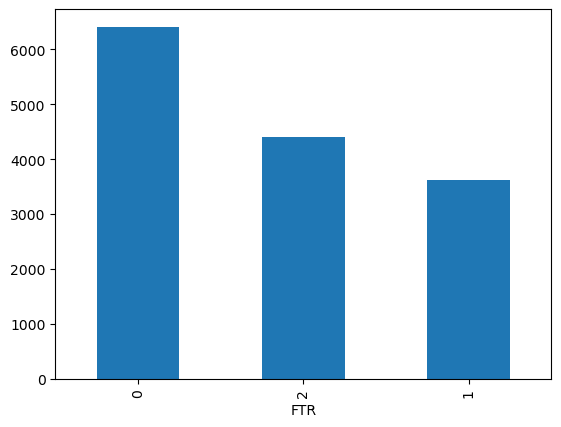

In [ ]:
# FTR 막대 그래프로 나타내기
%matplotlib inline
df['FTR'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# target 변수 값 변경해주기
# H -> 0, D -> 1, A -> 2

boolean1 = df['HTR'] == 'H'
boolean2 = df['HTR'] == 'D'
boolean3 = df['HTR'] == 'A'

df.loc[boolean1, 'HTR'] = 0
df.loc[boolean2, 'HTR'] = 1
df.loc[boolean3, 'HTR'] = 2

# type 변경(object -> int)
df['HTR'] = df['HTR'].astype(int)
df['HTR']

0        0
1        2
2        0
3        1
4        1
        ..
14449    2
14450    1
14451    2
14452    2
14453    1
Name: HTR, Length: 14454, dtype: int32

## FTR과 HTR의 상관계수

In [ ]:
# 교차분석표
### 전반전 끝난시점의 홈팀 어웨이팀 골 수 차이에 대하여 경기 끝난시점의 영향
a = pd.crosstab(index = df['FTR'], columns = df['HTR'])
a

HTR,0,1,2
FTR,,,
0,3849,2200,363
1,749,2185,694
2,311,1580,2523


In [ ]:
# HTR, FTR 간 상관관계(크래머 상관계수를 이용한..)
# 0.444으로 상관관계가 강하지 않음
from scipy.stats.contingency import association

association(a, method="cramer")

0.4439838741809424

In [ ]:
# 검정
# 결론: p-valule < 0.05보다 작으므로 연관성이 있다
import scipy.stats as stats
stats.chi2_contingency(a)

Chi2ContingencyResult(statistic=5698.393540839837, pvalue=0.0, dof=4, expected_freq=array([[2177.70222776, 2646.15884876, 1588.13892348],
       [1232.17462294, 1497.23398367,  898.59139339],
       [1499.1231493 , 1821.60716757, 1093.26968313]]))

## Div,Date,HomeTeam,AwayTeam,FTR, HTR 제외 한 나머지 칼럼 상관계수 구하기

In [ ]:
df_small = df.iloc[:, 4:44]
df_small = df_small.drop(['FTR', 'HTR'], axis=1)
df_small.columns

Index(['HTOa', 'ATOa', 'HTAt', 'ATAt', 'HTMid', 'ATMid', 'HTDef', 'ATDef',
       'HomeSquad', 'AwaySquad', 'HomeAvgAge', 'AwayAvgAge', 'HomeMV',
       'AwayMV', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HxG', 'AxG', 'HxA',
       'AxA', 'HxPTS', 'AxPTS', 'HPPDA', 'APPDA'],
      dtype='object')

In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HTOa        14454 non-null  int64  
 1   ATOa        14454 non-null  int64  
 2   HTAt        14454 non-null  int64  
 3   ATAt        14454 non-null  int64  
 4   HTMid       14454 non-null  int64  
 5   ATMid       14454 non-null  int64  
 6   HTDef       14454 non-null  int64  
 7   ATDef       14454 non-null  int64  
 8   HomeSquad   14454 non-null  int64  
 9   AwaySquad   14454 non-null  int64  
 10  HomeAvgAge  14454 non-null  int64  
 11  AwayAvgAge  14454 non-null  int64  
 12  HomeMV      14454 non-null  float64
 13  AwayMV      14454 non-null  float64
 14  FTHG        14454 non-null  int64  
 15  FTAG        14454 non-null  int64  
 16  HTHG        14454 non-null  float64
 17  HTAG        14454 non-null  float64
 18  HS          14454 non-null  float64
 19  AS          14454 non-nul

In [ ]:
df_corr = df_small.corr(method='pearson')
df_corr

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,HR,AR,HxG,AxG,HxA,AxA,HxPTS,AxPTS,HPPDA,APPDA
HTOa,1.000000,0.126819,0.922124,0.121104,0.957536,0.143368,0.948184,0.125242,0.075047,0.026989,...,-0.051971,-0.036211,0.336720,-0.176441,0.341213,-0.161907,0.321525,-0.303918,-0.124523,0.372811
ATOa,0.126819,1.000000,0.122073,0.922415,0.139822,0.957641,0.128365,0.949527,0.026569,0.074080,...,-0.001802,-0.044188,-0.209061,0.322242,-0.199118,0.321664,-0.334105,0.347298,0.354474,-0.179348
HTAt,0.922124,0.122073,1.000000,0.115055,0.872896,0.137670,0.855187,0.120641,0.097695,0.047581,...,-0.044646,-0.029876,0.327407,-0.159126,0.330708,-0.146486,0.301671,-0.284113,-0.114877,0.351800
ATAt,0.121104,0.922415,0.115055,1.000000,0.133966,0.873467,0.121309,0.856554,0.048947,0.095086,...,-0.000532,-0.047794,-0.192699,0.312364,-0.184719,0.311193,-0.316633,0.330344,0.338337,-0.167189
HTMid,0.957536,0.139822,0.872896,0.133966,1.000000,0.162913,0.900980,0.141547,0.057815,0.025081,...,-0.054299,-0.036824,0.324090,-0.168389,0.326170,-0.156392,0.308757,-0.291739,-0.110474,0.372157
ATMid,0.143368,0.957641,0.137670,0.873467,0.162913,1.000000,0.148519,0.903114,0.025843,0.058723,...,-0.002845,-0.045550,-0.196779,0.309414,-0.188708,0.310792,-0.317481,0.330360,0.352320,-0.162711
HTDef,0.948184,0.128365,0.855187,0.121309,0.900980,0.148519,1.000000,0.130246,0.054822,0.026246,...,-0.050022,-0.033030,0.317058,-0.171267,0.319711,-0.158326,0.306653,-0.289891,-0.107284,0.350130
ATDef,0.125242,0.949527,0.120641,0.856554,0.141547,0.903114,0.130246,1.000000,0.025443,0.052565,...,-0.000371,-0.042219,-0.209115,0.302269,-0.198858,0.301380,-0.323420,0.334605,0.336305,-0.164565
HomeSquad,0.075047,0.026569,0.097695,0.048947,0.057815,0.025843,0.054822,0.025443,1.000000,0.498937,...,0.014669,0.004735,0.005562,0.042623,0.001652,0.040048,-0.023139,0.026639,0.053104,0.032929
AwaySquad,0.026989,0.074080,0.047581,0.095086,0.025081,0.058723,0.026246,0.052565,0.498937,1.000000,...,-0.004624,0.025276,0.019943,0.031548,0.009628,0.030353,-0.003162,0.007121,0.070627,0.025331


<Axes: >

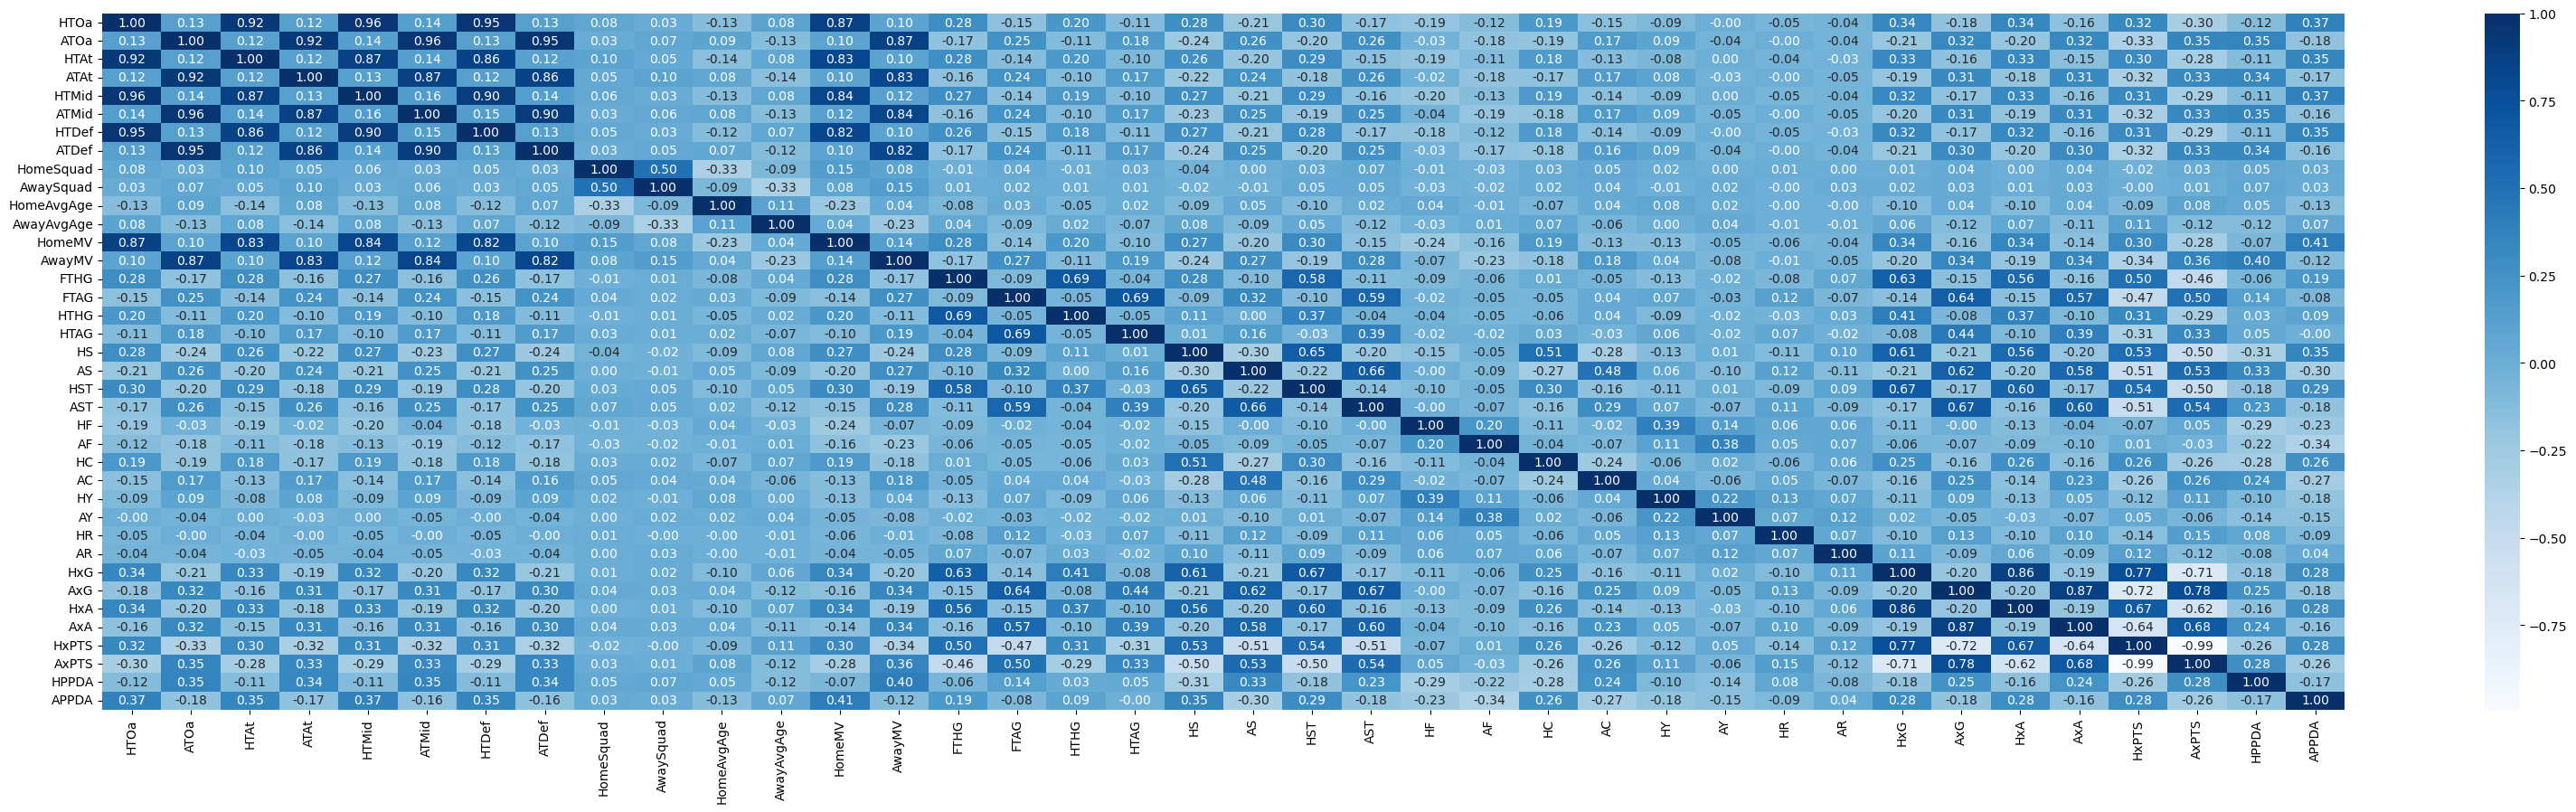

In [ ]:
# heatmap으로 나타내기
plt.figure(figsize=(40,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

C:\Users\leeji\AppData\Local\Temp\ipykernel_30884\3892550433.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<Axes: >

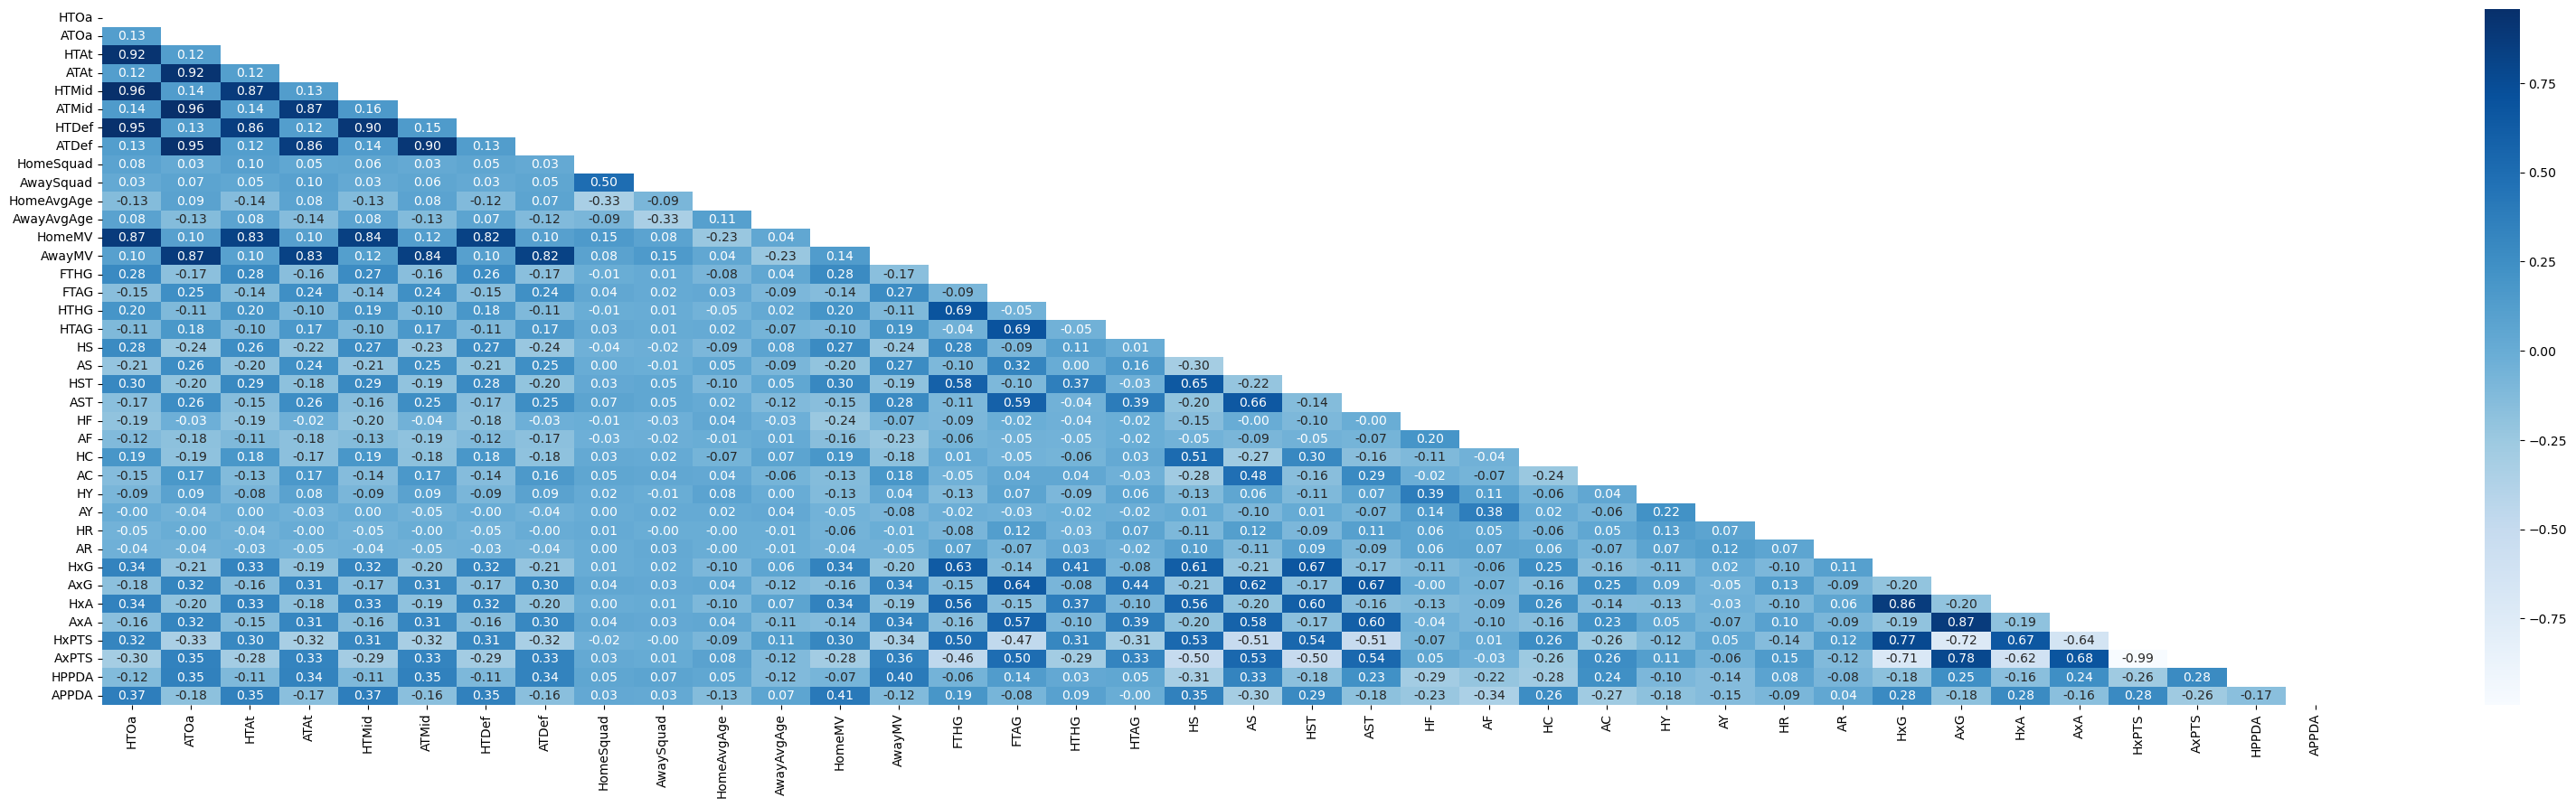

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(40, 10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

In [ ]:
df_new = df.iloc[:, 4:]
df_new = df_new.drop(['FTR', 'HTR'], axis=1)
df_new

,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,HTDef,ATDef,HomeSquad,AwaySquad,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,85,77,87,77,86,78,82,77,33,30,...,12.00,1.20,7.00,12.00,1.29,6.00,12.00,1.29,6.67,10.58
1,81,77,79,79,80,77,82,76,37,26,...,5.56,1.62,4.20,5.00,1.65,4.00,6.00,1.75,4.18,4.77
2,74,72,75,71,74,73,74,71,30,30,...,3.93,2.10,3.30,3.50,2.05,3.50,4.00,2.01,3.74,3.92
3,72,76,74,76,71,76,71,74,27,38,...,3.89,2.05,3.60,3.40,2.05,3.60,3.80,2.06,3.62,3.86
4,74,78,74,84,74,77,72,77,35,36,...,2.37,3.20,3.20,2.30,3.20,3.50,2.38,3.10,3.60,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,71,80,71,82,70,80,71,77,34,37,...,1.54,6.00,4.33,1.50,6.00,4.40,1.50,4.68,4.16,1.74
14450,82,75,82,77,82,75,83,73,36,46,...,23.58,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74
14451,75,81,77,81,76,80,71,80,43,37,...,1.46,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43
14452,71,74,71,75,71,73,68,74,51,44,...,4.79,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07


## Div,Date,HomeTeam,AwayTeam,FTR, HTR을 제외한 나머지 칼럼들과 FTR과의 상관계수

In [ ]:
column_list = list(df_new.columns)

for column in column_list:

    a = df_new[column]
    b = df['FTR']

    print(f'칼럼명 = {column}')
    print(stats.pointbiserialr(a, b)) # X: 연속형 변수, Y: 명목형 변수

칼럼명 = HTOa
SignificanceResult(statistic=-0.2540159682716101, pvalue=1.2537924017469405e-211)
칼럼명 = ATOa
SignificanceResult(statistic=0.2568240556358525, pvalue=1.8947445634754103e-216)
칼럼명 = HTAt
SignificanceResult(statistic=-0.2345298373881999, pvalue=8.07994182296711e-180)
칼럼명 = ATAt
SignificanceResult(statistic=0.24423937002413376, pvalue=2.595605927640536e-195)
칼럼명 = HTMid
SignificanceResult(statistic=-0.24126884311031516, pvalue=1.6941245351846555e-190)
칼럼명 = ATMid
SignificanceResult(statistic=0.24289181476676822, pvalue=4.041943216812504e-193)
칼럼명 = HTDef
SignificanceResult(statistic=-0.23906442656863636, pvalue=5.744267321761633e-187)
칼럼명 = ATDef
SignificanceResult(statistic=0.24826458305593196, pvalue=6.08436662212395e-202)
칼럼명 = HomeSquad
SignificanceResult(statistic=0.028270808604130913, pvalue=0.0006757402853966271)
칼럼명 = AwaySquad
SignificanceResult(statistic=0.001936340612189837, pvalue=0.8159351737492676)
칼럼명 = HomeAvgAge
SignificanceResult(statistic=0.06554407430623603, 

C:\Users\leeji\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\leeji\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


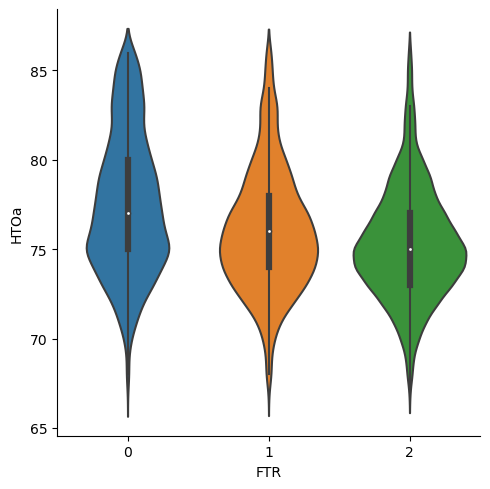

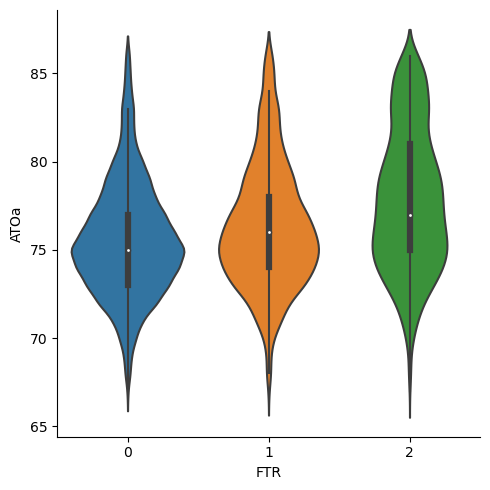

In [ ]:
# FTR, HTOa violin 그래프
sns.catplot(data=df, x='FTR', y='HTOa', kind='violin')
sns.catplot(data=df, x='FTR', y='ATOa', kind='violin')